# Estimating Air Quality Index(AQI) of Indian Cities using Machine Learniing algorithms to leverage Pollution Prediction

   Air pollution refers to the presence of harmful substances in the atmoshpere of this Earth which can be affect the human health and overall environenments. These pollutants can be in any form especcially gases and mixutre of solid or liquid substances in air or atmosphere which can cause potential impact on human health.
   
   Air Quality Index (AQI) is a numerical scale used to measure and  which is crucial indicator used to assess the air pollution levels  in a specific area and it impacts on humanity and the surrounding environment. As environmental enthusiast and a budding Data Scientist, I delved into this project aimed to develop an accurate and most reliable AQI estimation model using Machine Learning Algorithms.
      
   In this project, I used my Skills involved extensive data analysis and model developing, with a focus on understanding the influential factors affecting the air quality as well as environment. I collected a comprehensive dataset comprising various environmental parameters ad meterological factors, such as particulate matter(PM2.5, PM10), harmfull gases emittied by vechicles and industries such as NO2, NOx, SO2, CO, O3, Benzene, Toluene, Xylene etc which potentialy affects the air quality and cause several health issues. These parameters along with meteorological variables, provided valuable insights into the dynamics of the air pollution.
   
  

![Air Pollution](images.jpeg)

### Import the Necessary Libraries 

In [1]:
#Libraries required to Load, manipulate and visualize the data and to perform the Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Import the Data and Check the Features present in the Data Set 

In [2]:
# 'import the CSV data file using pandas library'
# I assigned a variable 'data_set' for the CSV file     
data_set= pd.read_csv('city_day.csv') # read the 'city_day.csv' file using pandas library 
data_set.head(10) # present the first 10 rows of the all the columns in 'data_set'.

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


These are the first 10 rows of the 'data_set' and it consists of particulate matters values and harmful gases values of several cities of india.

But it seems like our data set consist of lot of missing values

First see the list of cities present in our data set and the Lets check the counts of missing vaues in our data set   

## EDA(Exploratoy Data Anaysis)

Doing this to get insights from the data and vizualize the key insights

## See the list of cities present in the data_set 

In [3]:
cities= data_set["City"].unique() # by using unique() to check the unique values present in teh city columns
print(cities) # call the variable 'cities' to see the list of cities
print(len(cities)) # count the numer of cities present in 'data_set' 

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']
26


There are 26 cities totally present in the data_set.

Next we'll check the count of data present in each the cities   

In [107]:
data_set['City'].value_counts()

0     2009
10    2009
20    2009
4     2009
19    2009
8     2009
14    2006
21    1858
12    1679
25    1462
3     1221
16    1169
15    1114
24    1112
2      951
6      938
23     925
18     814
13     502
9      386
22     310
7      304
5      289
11     162
17     162
1      113
Name: City, dtype: int64

The 'City' column in this data_set holds significant importance as it represent the geographical location for which the AQI(Air Quality Index) is estimated. As we all know that the there are huge variations in the air quality across different cities due to several facotrs suchh as population, weather condition, public activities, transportation facilities, Industrial facilities,etc. Allowing for a localized understanding of the pollution levels in different cities

ohhhh! This cities have highly imbalanced data as well and with lot of missing values too.

First of all, Let's see the what should we do with missing values first. 

## Check the missing values and its percentage 

In [5]:
#Lets make a dataframe of  each columns and  see the 
null_values=pd.DataFrame({
    #'Columns':data_set.columns,
    'Null counts': data_set.isnull().sum(), # Gives the counts of missing values in each columns
    'Null Percentage' : (data_set.isnull().sum()/ len(data_set) *100).map('{:.2f}%'.format) # Gives the percentage of the null values 
})

print(null_values)

            Null counts Null Percentage
City                  0           0.00%
Date                  0           0.00%
PM2.5              4598          15.57%
PM10              11140          37.72%
NO                 3582          12.13%
NO2                3585          12.14%
NOx                4185          14.17%
NH3               10328          34.97%
CO                 2059           6.97%
SO2                3854          13.05%
O3                 4022          13.62%
Benzene            5623          19.04%
Toluene            8041          27.23%
Xylene            18109          61.32%
AQI                4681          15.85%
AQI_Bucket         4681          15.85%


By the look of it our data set consist lot of missing data  points

Let see what we can do with the missing values

Choices we have
1. To fill the missing values with mean or median.
2. To drop the missing values. 

I choose to fill the missing values with the mean (It is the most simple, straightforward and effecient method)   

But, due to geographical and meteorological factors we can't normally fill the missing values with over all mean.

because of this reason, I choose to fill with the averaged mean for each city. So, it will maintain the order of missing values and minize the disortion of data   

## Group the data by city and check the mean for each city

In [6]:
avg_by_city = data_set.groupby('City').transform('mean') # Reference from stack overflow
#group the data by city and calculate the mean of each city seperately by using transform function
avg_by_city.describe()

C:\Users\RASCAL\AppData\Local\Temp\ipykernel_4528\1480119980.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_by_city = data_set.groupby('City').transform('mean') # Reference from stack overflow


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,27522.000000,29531.000000,29531.000000,28362.000000,27522.000000,29531.000000,29531.000000,29369.000000,26799.000000,25521.000000,16484.000000,29531.000000
mean,66.234841,116.228087,18.226745,28.641768,32.855058,23.024137,2.602122,15.639939,34.329319,3.263615,8.276830,3.114350,169.486556
std,31.709480,47.911677,10.974596,13.766171,15.903958,14.939010,5.321265,12.596644,8.656062,4.349671,8.197117,2.215617,95.183460
min,17.130000,23.352857,0.917092,0.388496,1.002202,2.813625,0.239675,3.184051,3.707692,0.009138,0.000359,0.008010,34.765766
25%,41.130242,83.243287,9.409136,16.857623,19.717092,11.988493,0.663049,8.392101,32.443816,1.571172,2.595666,1.438339,105.352258
50%,55.468335,114.584029,15.233330,27.995042,29.377311,18.371518,1.067349,9.949676,33.611005,2.887419,5.780711,2.623059,133.679159
75%,109.714059,126.747958,26.846916,37.193188,45.952471,29.322199,1.838634,15.901253,37.523747,3.891348,10.370938,5.385581,225.123882
max,123.498562,232.809229,71.771625,59.025496,68.412901,63.452612,22.193407,55.253733,59.851036,38.432563,38.658406,7.356062,452.122939


Now we'll check the overall mean of the data set  

In [7]:
data_set.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


There is definetly a difference between the overall mean and mean of each city.

Now fill the missing values with the mean of each cities.

## Filling the missing values of each columns by the mean of each city

In [8]:
data_set['PM2.5'].fillna(avg_by_city['PM2.5'].mean().round(2), inplace=True)
data_set['PM10'].fillna(avg_by_city['PM10'].mean().round(2), inplace=True)
data_set['NO'].fillna(avg_by_city['NO'].mean().round(2), inplace=True)
data_set['NO2'].fillna(avg_by_city['NO2'].mean().round(2), inplace=True)
data_set['NOx'].fillna(avg_by_city['NOx'].mean().round(2), inplace=True)
data_set['NH3'].fillna(avg_by_city['NH3'].mean().round(2), inplace=True)
data_set['CO'].fillna(avg_by_city['CO'].mean().round(2), inplace=True)
data_set['SO2'].fillna(avg_by_city['SO2'].mean().round(2), inplace=True)
data_set['O3'].fillna(avg_by_city['O3'].mean().round(2), inplace=True)
data_set['Benzene'].fillna(avg_by_city['Benzene'].mean().round(2), inplace=True)
data_set['Toluene'].fillna(avg_by_city['Toluene'].mean().round(2), inplace=True)
data_set['Xylene'].fillna(avg_by_city['Xylene'].mean().round(2), inplace=True)
data_set['AQI'].fillna(avg_by_city['AQI'].mean().round(2), inplace=True)

data_set.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.260533,117.411457,17.654212,28.570291,32.387191,23.321383,2.273099,14.676582,34.469444,3.276872,8.586346,3.094578,166.943303
std,59.416124,71.506866,21.360291,22.941065,29.318566,20.712549,6.716349,16.913207,20.163519,14.226366,17.035800,3.932474,129.069081
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,58.030000,116.230000,11.530000,25.240000,27.550000,23.020000,0.950000,10.480000,34.330000,1.840000,6.930000,3.110000,138.000000
75%,72.450000,116.230000,18.230000,34.665000,36.015000,23.020000,1.710000,15.640000,42.730000,3.260000,8.280000,3.110000,179.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


Let's visualize the distribution of AQI for each cities

## Plot the AQI of each cities

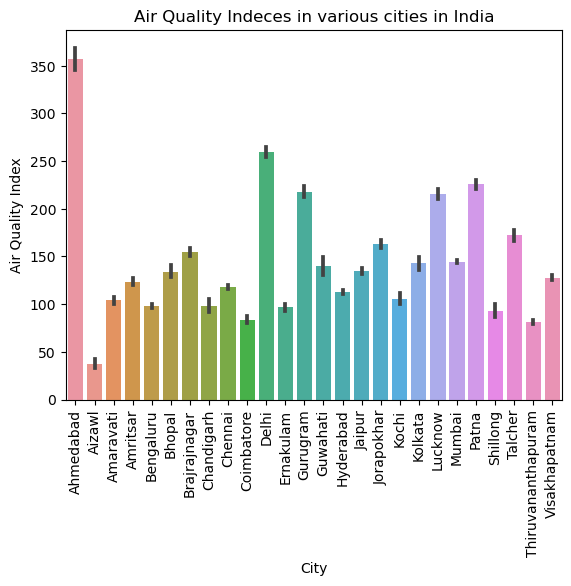

In [9]:
sns.barplot(x='City', y= 'AQI', data=data_set)
plt.xlabel('City')
plt.ylabel('Air Quality Index')
plt.title('Air Quality Indeces in various cities in India')
plt.xticks(rotation=90)
plt.show()

Now Let's Encode the object data type columns such as Cty and AQI Bucket using label encoder 

In [10]:
#import the label encoder from scikit learn library
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder() 
data_set['City']=lab.fit_transform(data_set['City']) #fit and transform to encode the city column 
data_set['AQI_Bucket']= lab.fit_transform(data_set['AQI_Bucket']) #fit and transform to encode the AQI Bucket column

data_set['City'].unique() #check the encoded data of city column

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [11]:
data_set['AQI_Bucket'].unique()

array([6, 2, 5, 4, 1, 3, 0])

## Correlation of the dataset

In this project AQI is the target variable and
Let see what are all the features have relationship with our target by using correlation and visualize it with the help of seaborn heatmap

C:\Users\RASCAL\AppData\Local\Temp\ipykernel_4528\4045941223.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=dt.corr()


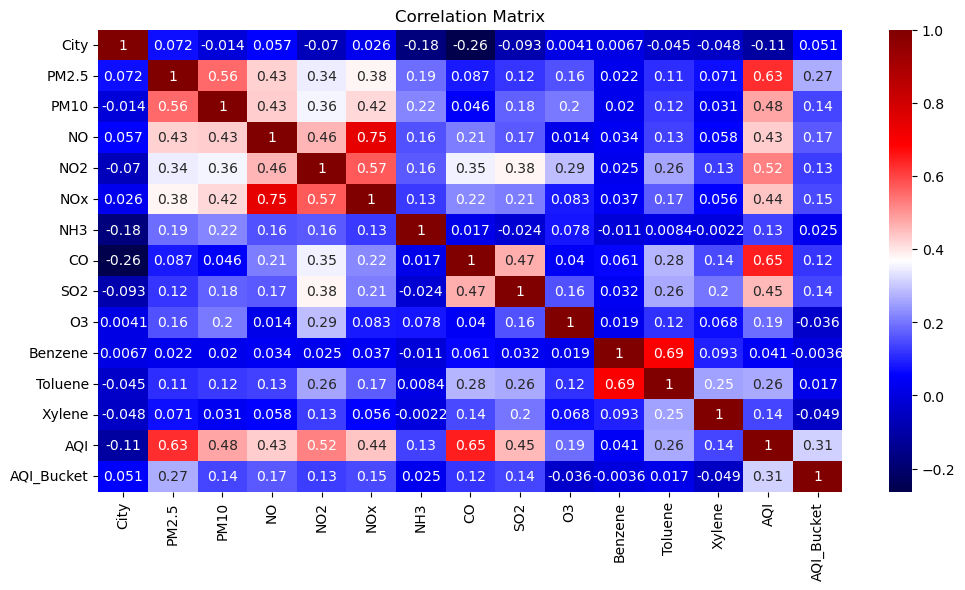

In [12]:
dt=data_set
correlation=dt.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True,cmap='seismic')
plt.title('Correlation Matrix')
plt.show()

By checking correlation, it seems that not all the column has high correlate with our target
but even the low correlated features can play crucial role 

Let's see the feature importance from training model

In [13]:
dt= dt.drop(columns='Date')
dt.shape

(29531, 15)

## Developing the Model

###  Split data for model building

Split the data into thte target (y) and features (X)

In [14]:
y=dt['AQI']
X=dt.drop(columns=['AQI'])
print(X.shape)
y.shape

(29531, 14)


(29531,)

## Experiment with various models

To create most accurate and robust model, I planned to experiment with several models and compare the performance and accracy of those models and choose the successful and most accurate model   

## Import the libraries and algoritms to create regression model

In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split  # to select best parameters for each model import gridsearch CV and import train_test
from sklearn.preprocessing import StandardScaler #use this to scale dta
from sklearn.linear_model import LinearRegression, Ridge, Lasso # basic regression model and regulrization techniques
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #import ensembling regression algorithms
from xgboost import XGBRegressor #import xgboost regression algorithm
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor #cat boost regression algorithm #got reference from github 

### Split the Training and Test data for the X and y(Features and Target)

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23624, 14)
(5907, 14)
(23624,)
(5907,)


## Scale the training and test features

Use Standard Scaler to rescale the training and test features of data 
but avoid scaling target variables.

In [17]:
scaler= StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

print(scaled_X_train.shape)
print(scaled_X_test.shape)

(23624, 14)
(5907, 14)


 ## 1.  Linear Regression Model

#### Instantiate Linear Regression

In [18]:
linear= LinearRegression()
linear

LinearRegression()

### Fit the Linear Regression Model with Training Data 

In [19]:
model_lr=linear.fit(scaled_X_train, y_train) #linearreg doesn't have hyperparameters

### Analyse  Metrics for the Linear Regression Model

Check the mean absolute error, root mean squared error and r2_score or explained variance score of the developed model.
 
Validate the Prediction result with test data.

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score, explained_variance_score

y_pred_lr=model_lr.predict(scaled_X_test)

mae=mean_absolute_error(y_test,y_pred_lr)
rmse=np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_score= r2_score(y_test, y_pred_lr)
evs= explained_variance_score(y_test,y_pred_lr)

print('Mean Absolute Error of linear Regression:', mae)
print('Root Mean Squared Error of linear Regression:', rmse)
print('Coeffecient of Determination of linear Regression:', r2_score)
print('explained_variance_score of linear regression:', evs)

Mean Absolute Error of linear Regression: 30.5858223818957
Root Mean Squared Error of linear Regression: 53.86216954896833
Coeffecient of Determination of linear Regression: 0.8075738068339972
explained_variance_score of linear regression: 0.8075772454681636


Our linear regression model performs with nearly ~81% accuracy

## Plot Regression Line 

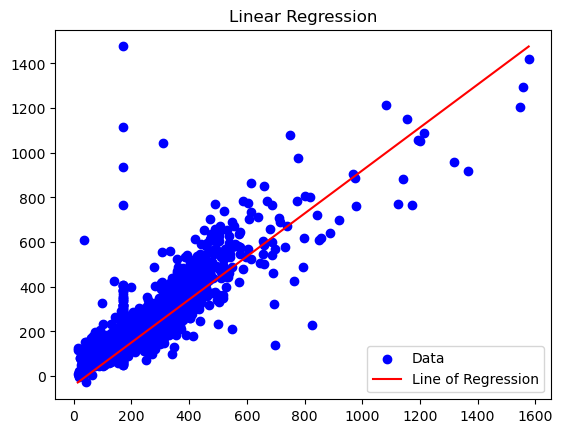

In [21]:
plt.scatter(y_test, y_pred_lr, color='b', label='Data') 
plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_pred_lr),np.max(y_pred_lr)], color='r', label='Line of Regression')
#plt.scatter(0, intercept, color='y', label='Y_Intercept')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Visualize the difference between the Actual test data and result of our prediction using Linear Regression

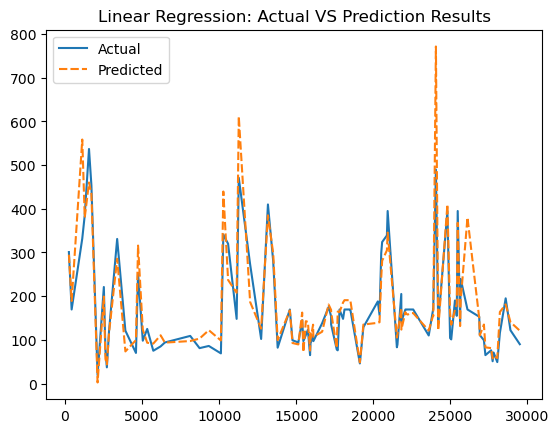

In [22]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
sns.lineplot(df.head(100))
plt.title('Linear Regression: Actual VS Prediction Results')
plt.show()

By using the line plot we see how our predicted result varies from the actual test data

## Ridge Regression for regularization

#### Instantiate Ridge regression

In [23]:
ridge=Ridge()
ridge

Ridge()

#### Assign a hyperparameters to the Ridge regression model to perform grid search and choose best parameters for ridge regression    

In [24]:
ridge_param_grid ={'alpha':[0.1,1],
                  'solver':['auto']}

#### Perform Grid Search and fit the Ridge model to the best parameter

In [25]:
ridge_grid_search= GridSearchCV(ridge, ridge_param_grid, cv=5)

In [26]:
model_ridge=ridge_grid_search.fit(scaled_X_train, y_train)

#### Get the best parameters and best score for the model  

In [27]:
ridge_best_params = ridge_grid_search.best_params_

ridge_best_score = ridge_grid_search.best_score_

print('Ridge best parameters:',ridge_best_params)
print('Ridge best score:',ridge_best_score)

Ridge best parameters: {'alpha': 1, 'solver': 'auto'}
Ridge best score: 0.7957439376369859


## Analyze the metrics for Ridge Model

In [28]:
y_pred_ridge=model_ridge.predict(scaled_X_test)

mae_rid=mean_absolute_error(y_test,y_pred_ridge)
rmse_rid=(mean_squared_error(y_test, y_pred_ridge, squared=False))
evs_rid = explained_variance_score(y_test,y_pred_ridge)

print('Mean Absolute Error of Ridge Regression:', mae_rid)
print('Root Mean Squared Error of Ridge  Regression:', rmse_rid)
print('explained_variance_score of Ridge Regression:', evs_rid)

Mean Absolute Error of Ridge Regression: 30.586198345995438
Root Mean Squared Error of Ridge  Regression: 53.861768792362554
explained_variance_score of Ridge Regression: 0.8075801089169179


### Plot th regression line of ridge model

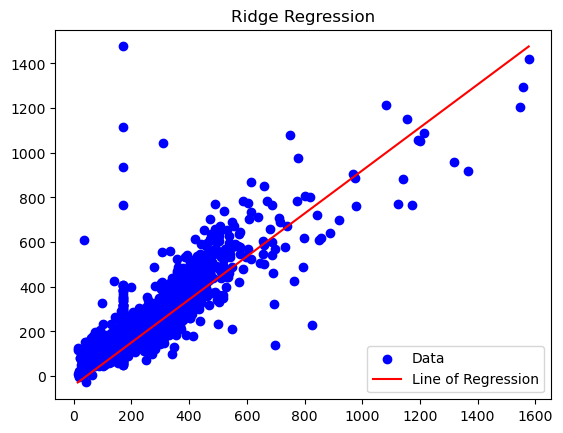

In [29]:
plt.scatter(y_test, y_pred_ridge, color='b', label='Data') 
plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_pred_ridge),np.max(y_pred_ridge)], color='r', label='Line of Regression')
#plt.scatter(0, intercept, color='y', label='Y_Intercept')
plt.title('Ridge Regression')
plt.legend()
plt.show()

### Visualize the differencec between the Actual test data and the result of our prediction using Ridge Regression

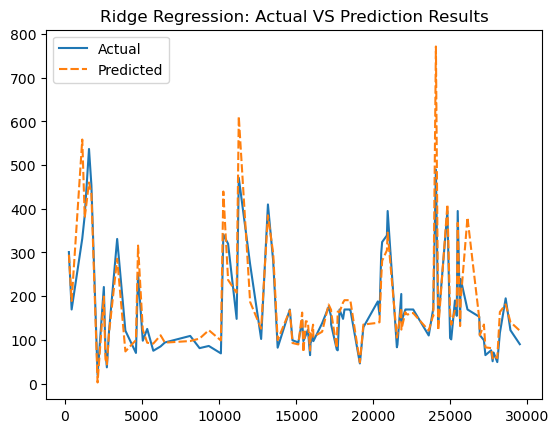

In [30]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
sns.lineplot(df.head(100))
plt.title('Ridge Regression: Actual VS Prediction Results')
plt.show()

## Lasso Regression

In [31]:
lasso=Lasso()
lasso

Lasso()

In [32]:
lasso_param_grid ={'alpha':[0.1,1],
                  'selection':['cyclic','random']}

In [33]:
lasso_grid_search= GridSearchCV(lasso, lasso_param_grid, cv=5)

#### Fit Lasso Model

In [43]:
model_lasso=lasso.fit(scaled_X_train, y_train)

In [35]:
lasso_best_params = lasso_grid_search.best_params_

lasso_best_score = lasso_grid_search.best_score_


print('Lasso best parameters:', lasso_best_params)
print('Lasso best score:',lasso_best_score)

Lasso best parameters: {'alpha': 0.1, 'selection': 'cyclic'}
Lasso best score: 0.7957472132249057


### Analyze the metrics for Lasso Model

In [44]:
y_pred_las=model_lasso.predict(X_test)

mae_las=mean_absolute_error(y_test,y_pred_las)
rmse_las=np.sqrt(mean_squared_error(y_test, y_pred_las))
#r2s_las= r2_score(y_test, y_pred_las)
evs_las= explained_variance_score(y_test,y_pred_las)

print('Mean Absolute Error of lasso Regression:', mae_las)
print('Root Mean Squared Error of lasso Regression:', rmse_las)
print('Coeffecient of Determination of lasso Regression:', evs_las)

Mean Absolute Error of lasso Regression: 6813.250701811775
Root Mean Squared Error of lasso Regression: 8019.93637242945
Coeffecient of Determination of lasso Regression: -1186.2034018593697


C:\Users\RASCAL\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


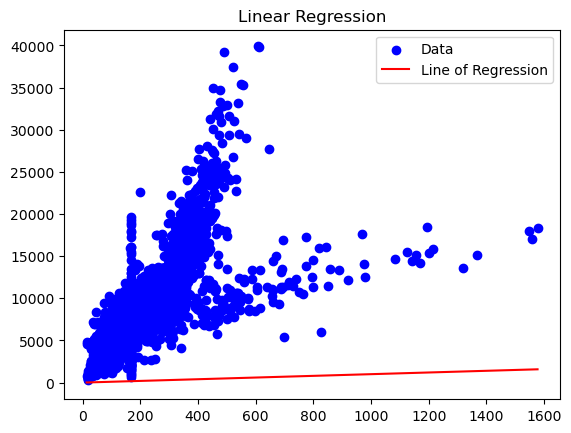

In [37]:
plt.scatter(y_test, y_pred_las, color='b', label='Data') 
plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_test),np.max(y_test)], color='r', label='Line of Regression')
#plt.scatter(0, intercept, color='y', label='Y_Intercept')
plt.title('Linear Regression')
plt.legend()
plt.show()

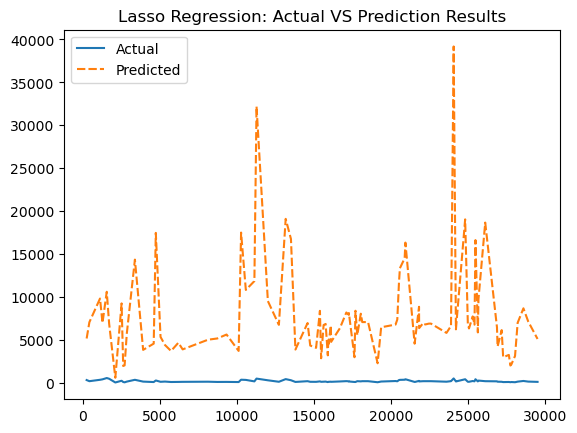

In [38]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_las})
sns.lineplot(df.head(100))
plt.title('Lasso Regression: Actual VS Prediction Results')
plt.show()

##### Our Lasso model didnt Perform Well with ur test data, consider it as an underfit model and ignore the model. 

## Random Forest Model

In [39]:
rf= RandomForestRegressor()
rf

RandomForestRegressor()

In [40]:
param_grid_rf={'n_estimators': [100,200,300],
              'max_depth':[None, 5, 10],
              'min_samples_split':[2,5,10]}

In [45]:
rf_grid_search= GridSearchCV(rf, param_grid_rf, cv=5)
model_rf= rf_grid_search

In [46]:
model_rf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [47]:
rf_best_params = rf_grid_search.best_params_

rf_best_score = rf_grid_search.best_score_

print('Random Forest best parameters:',rf_best_params)
print('Random Forest best score:',rf_best_score)

Random Forest best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest best score: 0.9303480555893335


In [48]:
y_pred_rf=model_rf.predict(scaled_X_test)

mae_rf=mean_absolute_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test, y_pred_rf))
#r2s_rf=np.array([r2_score(y_test, y_pred_rf)])
evs_rf= explained_variance_score(y_test,y_pred_rf)

print('Mean Absolute Error of  Random Forest Regression:', mae_rf)
print('Root Mean Squared Error of  Random Forest Regression:', rmse_rf)
print('Coeffecient of Determination of Random Forest Regression:', evs_rf)

Mean Absolute Error of  Random Forest Regression: 12.959982878660279
Root Mean Squared Error of  Random Forest Regression: 26.5673063431299
Coeffecient of Determination of Random Forest Regression: 0.953324404351506


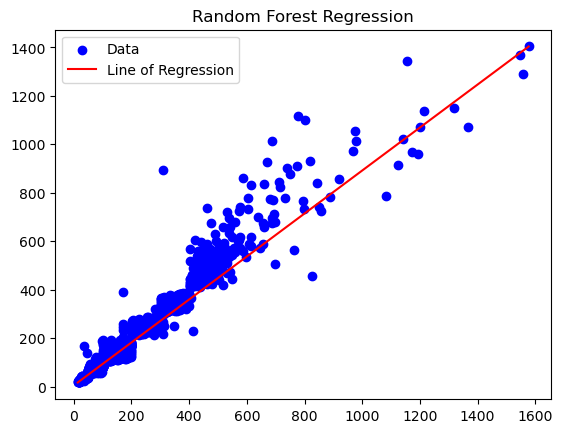

In [49]:
plt.scatter(y_test, y_pred_rf, color='b', label='Data') 
plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_pred_rf),np.max(y_pred_rf)], color='r', label='Line of Regression')
#plt.scatter(0, intercept, color='y', label='Y_Intercept')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

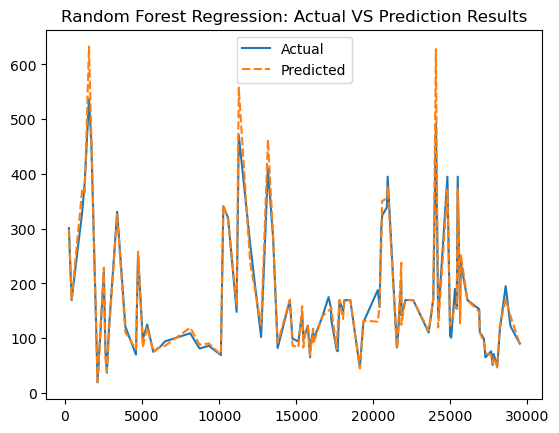

In [50]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
sns.lineplot(df.head(100))
plt.title('Random Forest Regression: Actual VS Prediction Results')
plt.show()

## Cat Boost Regression model

In [51]:
cat =  CatBoostRegressor()
cat

In [52]:
cat_param_grid = {'iterations':[100,200,300],
                 'learning_rate':[0.1,0.01],
                 'depth':[3,5,7]}

In [53]:
cat_grid_search=GridSearchCV(cat, cat_param_grid, cv=5)
model_cat = cat_grid_search

In [54]:
model_cat.fit(scaled_X_train, y_train)

0:	learn: 122.6514869	total: 280ms	remaining: 27.7s
1:	learn: 114.4059527	total: 288ms	remaining: 14.1s
2:	learn: 107.2467465	total: 295ms	remaining: 9.53s
3:	learn: 101.0534905	total: 302ms	remaining: 7.25s
4:	learn: 95.1295759	total: 311ms	remaining: 5.9s
5:	learn: 90.2757016	total: 318ms	remaining: 4.98s
6:	learn: 86.0374077	total: 325ms	remaining: 4.32s
7:	learn: 82.2610542	total: 332ms	remaining: 3.81s
8:	learn: 78.6545342	total: 339ms	remaining: 3.43s
9:	learn: 75.6675616	total: 346ms	remaining: 3.12s
10:	learn: 72.8513470	total: 354ms	remaining: 2.86s
11:	learn: 70.4891609	total: 362ms	remaining: 2.65s
12:	learn: 68.1309865	total: 368ms	remaining: 2.46s
13:	learn: 65.0867275	total: 375ms	remaining: 2.3s
14:	learn: 63.1916134	total: 382ms	remaining: 2.16s
15:	learn: 61.5109830	total: 388ms	remaining: 2.04s
16:	learn: 60.0324547	total: 394ms	remaining: 1.92s
17:	learn: 57.8235676	total: 400ms	remaining: 1.82s
18:	learn: 55.9350501	total: 406ms	remaining: 1.73s
19:	learn: 54.846754

59:	learn: 38.4101711	total: 395ms	remaining: 264ms
60:	learn: 38.3297252	total: 403ms	remaining: 258ms
61:	learn: 38.1963700	total: 410ms	remaining: 251ms
62:	learn: 38.0515183	total: 416ms	remaining: 245ms
63:	learn: 37.8678703	total: 424ms	remaining: 238ms
64:	learn: 37.7543941	total: 431ms	remaining: 232ms
65:	learn: 37.6442182	total: 439ms	remaining: 226ms
66:	learn: 37.5712045	total: 447ms	remaining: 220ms
67:	learn: 37.3054212	total: 453ms	remaining: 213ms
68:	learn: 37.2498493	total: 459ms	remaining: 206ms
69:	learn: 37.1454157	total: 465ms	remaining: 199ms
70:	learn: 37.0444620	total: 471ms	remaining: 192ms
71:	learn: 36.7302441	total: 477ms	remaining: 185ms
72:	learn: 36.4595118	total: 483ms	remaining: 179ms
73:	learn: 36.3464796	total: 489ms	remaining: 172ms
74:	learn: 36.2730819	total: 496ms	remaining: 165ms
75:	learn: 36.2055574	total: 501ms	remaining: 158ms
76:	learn: 36.1082698	total: 507ms	remaining: 152ms
77:	learn: 36.0566063	total: 513ms	remaining: 145ms
78:	learn: 3

31:	learn: 47.0977390	total: 208ms	remaining: 441ms
32:	learn: 46.7494564	total: 214ms	remaining: 435ms
33:	learn: 46.1103031	total: 222ms	remaining: 430ms
34:	learn: 45.8058560	total: 229ms	remaining: 425ms
35:	learn: 45.5351216	total: 235ms	remaining: 419ms
36:	learn: 44.9407414	total: 245ms	remaining: 418ms
37:	learn: 44.6673275	total: 252ms	remaining: 412ms
38:	learn: 44.1978664	total: 258ms	remaining: 404ms
39:	learn: 43.9157911	total: 264ms	remaining: 397ms
40:	learn: 43.5908182	total: 270ms	remaining: 389ms
41:	learn: 43.4075237	total: 297ms	remaining: 410ms
42:	learn: 43.0755785	total: 310ms	remaining: 411ms
43:	learn: 42.9617750	total: 323ms	remaining: 411ms
44:	learn: 42.7107551	total: 335ms	remaining: 409ms
45:	learn: 42.5336089	total: 347ms	remaining: 408ms
46:	learn: 42.2276601	total: 362ms	remaining: 408ms
47:	learn: 42.0963872	total: 372ms	remaining: 403ms
48:	learn: 41.8645610	total: 379ms	remaining: 394ms
49:	learn: 41.6413833	total: 388ms	remaining: 388ms
50:	learn: 4

94:	learn: 34.8503675	total: 590ms	remaining: 31ms
95:	learn: 34.7660394	total: 597ms	remaining: 24.9ms
96:	learn: 34.7006923	total: 604ms	remaining: 18.7ms
97:	learn: 34.6181271	total: 611ms	remaining: 12.5ms
98:	learn: 34.5345206	total: 618ms	remaining: 6.25ms
99:	learn: 34.3455236	total: 627ms	remaining: 0us
0:	learn: 130.6948162	total: 8.29ms	remaining: 821ms
1:	learn: 129.7634475	total: 14.8ms	remaining: 724ms
2:	learn: 128.8445192	total: 20.4ms	remaining: 660ms
3:	learn: 127.9647162	total: 25.9ms	remaining: 623ms
4:	learn: 127.1113383	total: 31.7ms	remaining: 602ms
5:	learn: 126.2793303	total: 37.2ms	remaining: 583ms
6:	learn: 125.4672626	total: 42.8ms	remaining: 569ms
7:	learn: 124.6087323	total: 48.5ms	remaining: 558ms
8:	learn: 123.7431656	total: 54.2ms	remaining: 548ms
9:	learn: 122.8986112	total: 60ms	remaining: 540ms
10:	learn: 122.0696918	total: 65.7ms	remaining: 531ms
11:	learn: 121.2461248	total: 71.3ms	remaining: 523ms
12:	learn: 120.4502911	total: 77.2ms	remaining: 517

60:	learn: 90.0314355	total: 398ms	remaining: 254ms
61:	learn: 89.5862514	total: 407ms	remaining: 250ms
62:	learn: 89.1416759	total: 415ms	remaining: 244ms
63:	learn: 88.7118265	total: 424ms	remaining: 238ms
64:	learn: 88.2501783	total: 430ms	remaining: 232ms
65:	learn: 87.7941037	total: 439ms	remaining: 226ms
66:	learn: 87.3703881	total: 445ms	remaining: 219ms
67:	learn: 86.9639078	total: 451ms	remaining: 212ms
68:	learn: 86.4642372	total: 457ms	remaining: 205ms
69:	learn: 86.0262434	total: 463ms	remaining: 198ms
70:	learn: 85.6217727	total: 469ms	remaining: 192ms
71:	learn: 85.1900900	total: 475ms	remaining: 185ms
72:	learn: 84.7729275	total: 481ms	remaining: 178ms
73:	learn: 84.3854324	total: 486ms	remaining: 171ms
74:	learn: 83.9988178	total: 492ms	remaining: 164ms
75:	learn: 83.6181046	total: 498ms	remaining: 157ms
76:	learn: 83.2314297	total: 503ms	remaining: 150ms
77:	learn: 82.8622306	total: 509ms	remaining: 144ms
78:	learn: 82.4921189	total: 515ms	remaining: 137ms
79:	learn: 8

25:	learn: 109.3082358	total: 219ms	remaining: 623ms
26:	learn: 108.6326214	total: 227ms	remaining: 613ms
27:	learn: 107.9725096	total: 233ms	remaining: 600ms
28:	learn: 107.3291565	total: 240ms	remaining: 589ms
29:	learn: 106.7154237	total: 248ms	remaining: 579ms
30:	learn: 106.1012821	total: 259ms	remaining: 576ms
31:	learn: 105.5045985	total: 265ms	remaining: 564ms
32:	learn: 104.8762479	total: 273ms	remaining: 555ms
33:	learn: 104.2681324	total: 280ms	remaining: 543ms
34:	learn: 103.6896450	total: 286ms	remaining: 532ms
35:	learn: 103.0574251	total: 292ms	remaining: 520ms
36:	learn: 102.4288196	total: 298ms	remaining: 508ms
37:	learn: 101.8111595	total: 304ms	remaining: 496ms
38:	learn: 101.1997338	total: 309ms	remaining: 484ms
39:	learn: 100.6215632	total: 315ms	remaining: 472ms
40:	learn: 100.0501828	total: 321ms	remaining: 462ms
41:	learn: 99.4727076	total: 326ms	remaining: 451ms
42:	learn: 98.9374951	total: 332ms	remaining: 440ms
43:	learn: 98.4053937	total: 337ms	remaining: 42

97:	learn: 76.2147999	total: 596ms	remaining: 12.2ms
98:	learn: 75.9187583	total: 604ms	remaining: 6.1ms
99:	learn: 75.5425257	total: 610ms	remaining: 0us
0:	learn: 122.6514869	total: 14.2ms	remaining: 2.82s
1:	learn: 114.4059527	total: 27.9ms	remaining: 2.76s
2:	learn: 107.2467465	total: 33.7ms	remaining: 2.21s
3:	learn: 101.0534905	total: 39.3ms	remaining: 1.93s
4:	learn: 95.1295759	total: 45ms	remaining: 1.75s
5:	learn: 90.2757016	total: 50.5ms	remaining: 1.63s
6:	learn: 86.0374077	total: 56.1ms	remaining: 1.55s
7:	learn: 82.2610542	total: 61.8ms	remaining: 1.48s
8:	learn: 78.6545342	total: 67.5ms	remaining: 1.43s
9:	learn: 75.6675616	total: 73.4ms	remaining: 1.39s
10:	learn: 72.8513470	total: 79ms	remaining: 1.36s
11:	learn: 70.4891609	total: 84.5ms	remaining: 1.32s
12:	learn: 68.1309865	total: 90.5ms	remaining: 1.3s
13:	learn: 65.0867275	total: 96.4ms	remaining: 1.28s
14:	learn: 63.1916134	total: 102ms	remaining: 1.26s
15:	learn: 61.5109830	total: 108ms	remaining: 1.24s
16:	learn:

157:	learn: 31.9289446	total: 986ms	remaining: 262ms
158:	learn: 31.8938534	total: 993ms	remaining: 256ms
159:	learn: 31.8314344	total: 1000ms	remaining: 250ms
160:	learn: 31.7860052	total: 1.01s	remaining: 244ms
161:	learn: 31.7525460	total: 1.01s	remaining: 238ms
162:	learn: 31.7166964	total: 1.02s	remaining: 232ms
163:	learn: 31.6828722	total: 1.03s	remaining: 226ms
164:	learn: 31.6544788	total: 1.03s	remaining: 219ms
165:	learn: 31.6208047	total: 1.04s	remaining: 213ms
166:	learn: 31.5825811	total: 1.04s	remaining: 207ms
167:	learn: 31.5637245	total: 1.05s	remaining: 200ms
168:	learn: 31.5312824	total: 1.06s	remaining: 194ms
169:	learn: 31.4801214	total: 1.06s	remaining: 188ms
170:	learn: 31.4228255	total: 1.07s	remaining: 181ms
171:	learn: 31.3921503	total: 1.07s	remaining: 175ms
172:	learn: 31.3669021	total: 1.08s	remaining: 169ms
173:	learn: 31.3059904	total: 1.09s	remaining: 163ms
174:	learn: 31.2731340	total: 1.09s	remaining: 156ms
175:	learn: 31.2435323	total: 1.1s	remaining:

123:	learn: 32.3951078	total: 784ms	remaining: 481ms
124:	learn: 32.3314057	total: 792ms	remaining: 475ms
125:	learn: 32.3033964	total: 799ms	remaining: 469ms
126:	learn: 32.2619715	total: 806ms	remaining: 463ms
127:	learn: 32.2051891	total: 812ms	remaining: 457ms
128:	learn: 32.1500527	total: 819ms	remaining: 451ms
129:	learn: 32.1126796	total: 828ms	remaining: 446ms
130:	learn: 32.0895339	total: 833ms	remaining: 439ms
131:	learn: 32.0554178	total: 840ms	remaining: 433ms
132:	learn: 32.0210940	total: 846ms	remaining: 426ms
133:	learn: 31.9686062	total: 852ms	remaining: 419ms
134:	learn: 31.8493896	total: 858ms	remaining: 413ms
135:	learn: 31.7898694	total: 865ms	remaining: 407ms
136:	learn: 31.7366601	total: 871ms	remaining: 400ms
137:	learn: 31.7113605	total: 878ms	remaining: 394ms
138:	learn: 31.6763591	total: 883ms	remaining: 388ms
139:	learn: 31.5978895	total: 889ms	remaining: 381ms
140:	learn: 31.5553778	total: 894ms	remaining: 374ms
141:	learn: 31.5062235	total: 901ms	remaining:

89:	learn: 35.6174480	total: 591ms	remaining: 722ms
90:	learn: 35.5371079	total: 599ms	remaining: 717ms
91:	learn: 35.4018653	total: 606ms	remaining: 711ms
92:	learn: 35.2925411	total: 613ms	remaining: 705ms
93:	learn: 35.1775641	total: 620ms	remaining: 699ms
94:	learn: 35.1333473	total: 627ms	remaining: 693ms
95:	learn: 35.0210576	total: 635ms	remaining: 688ms
96:	learn: 34.9020258	total: 641ms	remaining: 681ms
97:	learn: 34.8124925	total: 648ms	remaining: 675ms
98:	learn: 34.7356916	total: 654ms	remaining: 667ms
99:	learn: 34.6833039	total: 661ms	remaining: 661ms
100:	learn: 34.6019074	total: 666ms	remaining: 653ms
101:	learn: 34.5420099	total: 672ms	remaining: 646ms
102:	learn: 34.4580370	total: 678ms	remaining: 639ms
103:	learn: 34.4301987	total: 684ms	remaining: 631ms
104:	learn: 34.3642038	total: 689ms	remaining: 623ms
105:	learn: 34.3064560	total: 695ms	remaining: 616ms
106:	learn: 34.2528744	total: 700ms	remaining: 609ms
107:	learn: 34.2291634	total: 706ms	remaining: 602ms
108:

61:	learn: 39.4840079	total: 408ms	remaining: 907ms
62:	learn: 39.3340411	total: 416ms	remaining: 904ms
63:	learn: 39.2177906	total: 423ms	remaining: 898ms
64:	learn: 39.1711461	total: 430ms	remaining: 893ms
65:	learn: 39.0470671	total: 437ms	remaining: 888ms
66:	learn: 38.9768571	total: 446ms	remaining: 885ms
67:	learn: 38.8740625	total: 481ms	remaining: 933ms
68:	learn: 38.7847503	total: 489ms	remaining: 928ms
69:	learn: 38.6574035	total: 500ms	remaining: 928ms
70:	learn: 38.5403621	total: 509ms	remaining: 924ms
71:	learn: 38.4980075	total: 516ms	remaining: 918ms
72:	learn: 38.2017943	total: 524ms	remaining: 912ms
73:	learn: 38.0812931	total: 530ms	remaining: 903ms
74:	learn: 37.9357919	total: 536ms	remaining: 894ms
75:	learn: 37.7811018	total: 542ms	remaining: 884ms
76:	learn: 37.6714533	total: 548ms	remaining: 875ms
77:	learn: 37.5598017	total: 553ms	remaining: 865ms
78:	learn: 37.4152815	total: 559ms	remaining: 856ms
79:	learn: 37.1783317	total: 565ms	remaining: 847ms
80:	learn: 3

33:	learn: 44.4035709	total: 202ms	remaining: 987ms
34:	learn: 44.1062225	total: 210ms	remaining: 991ms
35:	learn: 43.5789369	total: 217ms	remaining: 991ms
36:	learn: 43.3416262	total: 224ms	remaining: 987ms
37:	learn: 43.1133728	total: 231ms	remaining: 984ms
38:	learn: 42.8698958	total: 239ms	remaining: 985ms
39:	learn: 42.6138604	total: 246ms	remaining: 986ms
40:	learn: 42.4376680	total: 253ms	remaining: 981ms
41:	learn: 42.2621709	total: 259ms	remaining: 973ms
42:	learn: 41.8877037	total: 265ms	remaining: 967ms
43:	learn: 41.6019494	total: 270ms	remaining: 959ms
44:	learn: 41.4162356	total: 276ms	remaining: 950ms
45:	learn: 41.2161858	total: 282ms	remaining: 943ms
46:	learn: 41.0451797	total: 287ms	remaining: 935ms
47:	learn: 40.7956887	total: 293ms	remaining: 927ms
48:	learn: 40.6657601	total: 299ms	remaining: 921ms
49:	learn: 40.3487352	total: 305ms	remaining: 916ms
50:	learn: 40.1789023	total: 312ms	remaining: 912ms
51:	learn: 40.0760802	total: 318ms	remaining: 906ms
52:	learn: 3

0:	learn: 130.6948162	total: 12.3ms	remaining: 2.45s
1:	learn: 129.7634475	total: 23.8ms	remaining: 2.35s
2:	learn: 128.8445192	total: 35.6ms	remaining: 2.34s
3:	learn: 127.9647162	total: 47ms	remaining: 2.3s
4:	learn: 127.1113383	total: 57.5ms	remaining: 2.24s
5:	learn: 126.2793303	total: 64.5ms	remaining: 2.08s
6:	learn: 125.4672626	total: 71.4ms	remaining: 1.97s
7:	learn: 124.6087323	total: 78.6ms	remaining: 1.89s
8:	learn: 123.7431656	total: 85.6ms	remaining: 1.82s
9:	learn: 122.8986112	total: 92.7ms	remaining: 1.76s
10:	learn: 122.0696918	total: 99.9ms	remaining: 1.72s
11:	learn: 121.2461248	total: 107ms	remaining: 1.67s
12:	learn: 120.4502911	total: 114ms	remaining: 1.64s
13:	learn: 119.6991512	total: 121ms	remaining: 1.61s
14:	learn: 118.8886768	total: 128ms	remaining: 1.58s
15:	learn: 118.1599048	total: 135ms	remaining: 1.55s
16:	learn: 117.3962415	total: 142ms	remaining: 1.53s
17:	learn: 116.6409514	total: 149ms	remaining: 1.5s
18:	learn: 115.8944146	total: 155ms	remaining: 1.

168:	learn: 60.4631194	total: 1.16s	remaining: 214ms
169:	learn: 60.2431482	total: 1.17s	remaining: 207ms
170:	learn: 60.0884929	total: 1.18s	remaining: 200ms
171:	learn: 59.9491916	total: 1.19s	remaining: 194ms
172:	learn: 59.8007182	total: 1.2s	remaining: 187ms
173:	learn: 59.6590404	total: 1.21s	remaining: 180ms
174:	learn: 59.5107569	total: 1.21s	remaining: 173ms
175:	learn: 59.3683658	total: 1.22s	remaining: 167ms
176:	learn: 59.1595784	total: 1.23s	remaining: 160ms
177:	learn: 59.0300659	total: 1.24s	remaining: 153ms
178:	learn: 58.9053162	total: 1.24s	remaining: 146ms
179:	learn: 58.7660222	total: 1.25s	remaining: 139ms
180:	learn: 58.6258472	total: 1.26s	remaining: 132ms
181:	learn: 58.4319233	total: 1.26s	remaining: 125ms
182:	learn: 58.3058197	total: 1.27s	remaining: 118ms
183:	learn: 58.1086119	total: 1.27s	remaining: 111ms
184:	learn: 57.9835050	total: 1.28s	remaining: 104ms
185:	learn: 57.7908621	total: 1.29s	remaining: 96.9ms
186:	learn: 57.6548608	total: 1.29s	remaining:

125:	learn: 67.5198440	total: 794ms	remaining: 467ms
126:	learn: 67.2957271	total: 802ms	remaining: 461ms
127:	learn: 67.0631600	total: 809ms	remaining: 455ms
128:	learn: 66.7692922	total: 817ms	remaining: 450ms
129:	learn: 66.5458700	total: 824ms	remaining: 444ms
130:	learn: 66.3285652	total: 832ms	remaining: 438ms
131:	learn: 66.1121637	total: 838ms	remaining: 432ms
132:	learn: 65.8334033	total: 844ms	remaining: 425ms
133:	learn: 65.6086715	total: 851ms	remaining: 419ms
134:	learn: 65.3912014	total: 856ms	remaining: 412ms
135:	learn: 65.1824885	total: 863ms	remaining: 406ms
136:	learn: 64.9107724	total: 869ms	remaining: 399ms
137:	learn: 64.7081659	total: 874ms	remaining: 393ms
138:	learn: 64.5076422	total: 881ms	remaining: 387ms
139:	learn: 64.2437846	total: 888ms	remaining: 380ms
140:	learn: 64.0409192	total: 894ms	remaining: 374ms
141:	learn: 63.8367768	total: 900ms	remaining: 367ms
142:	learn: 63.6386271	total: 905ms	remaining: 361ms
143:	learn: 63.4574255	total: 912ms	remaining:

94:	learn: 76.7461901	total: 590ms	remaining: 652ms
95:	learn: 76.4484532	total: 600ms	remaining: 650ms
96:	learn: 76.1605777	total: 609ms	remaining: 647ms
97:	learn: 75.7774931	total: 617ms	remaining: 642ms
98:	learn: 75.4775336	total: 624ms	remaining: 636ms
99:	learn: 75.1056912	total: 632ms	remaining: 632ms
100:	learn: 74.8201845	total: 638ms	remaining: 625ms
101:	learn: 74.5298452	total: 644ms	remaining: 619ms
102:	learn: 74.1687998	total: 650ms	remaining: 612ms
103:	learn: 73.8136598	total: 656ms	remaining: 605ms
104:	learn: 73.5283166	total: 662ms	remaining: 599ms
105:	learn: 73.2606222	total: 669ms	remaining: 594ms
106:	learn: 72.9080518	total: 675ms	remaining: 587ms
107:	learn: 72.6407734	total: 681ms	remaining: 580ms
108:	learn: 72.3654664	total: 687ms	remaining: 573ms
109:	learn: 72.0309032	total: 693ms	remaining: 567ms
110:	learn: 71.7647634	total: 698ms	remaining: 560ms
111:	learn: 71.5039318	total: 704ms	remaining: 553ms
112:	learn: 71.1716120	total: 710ms	remaining: 546ms

61:	learn: 89.4569109	total: 390ms	remaining: 867ms
62:	learn: 89.0249157	total: 398ms	remaining: 864ms
63:	learn: 88.5997824	total: 404ms	remaining: 859ms
64:	learn: 88.1670242	total: 412ms	remaining: 855ms
65:	learn: 87.7141739	total: 419ms	remaining: 850ms
66:	learn: 87.2997758	total: 426ms	remaining: 846ms
67:	learn: 86.8873820	total: 434ms	remaining: 843ms
68:	learn: 86.4738684	total: 441ms	remaining: 836ms
69:	learn: 86.0379434	total: 446ms	remaining: 829ms
70:	learn: 85.6449771	total: 452ms	remaining: 821ms
71:	learn: 85.2717229	total: 458ms	remaining: 815ms
72:	learn: 84.8553246	total: 464ms	remaining: 807ms
73:	learn: 84.4660562	total: 470ms	remaining: 800ms
74:	learn: 84.0043564	total: 476ms	remaining: 793ms
75:	learn: 83.5962661	total: 482ms	remaining: 786ms
76:	learn: 83.2151858	total: 488ms	remaining: 779ms
77:	learn: 82.8305460	total: 494ms	remaining: 773ms
78:	learn: 82.3914030	total: 501ms	remaining: 768ms
79:	learn: 81.9669169	total: 508ms	remaining: 762ms
80:	learn: 8

32:	learn: 105.6640524	total: 194ms	remaining: 981ms
33:	learn: 105.0445082	total: 202ms	remaining: 984ms
34:	learn: 104.4579533	total: 209ms	remaining: 984ms
35:	learn: 103.8332433	total: 216ms	remaining: 983ms
36:	learn: 103.1951279	total: 223ms	remaining: 983ms
37:	learn: 102.5704187	total: 230ms	remaining: 982ms
38:	learn: 102.0014499	total: 239ms	remaining: 985ms
39:	learn: 101.4150081	total: 244ms	remaining: 978ms
40:	learn: 100.8305411	total: 250ms	remaining: 970ms
41:	learn: 100.2843439	total: 256ms	remaining: 965ms
42:	learn: 99.7093250	total: 262ms	remaining: 958ms
43:	learn: 99.1696874	total: 268ms	remaining: 951ms
44:	learn: 98.6094257	total: 274ms	remaining: 944ms
45:	learn: 98.0492099	total: 280ms	remaining: 936ms
46:	learn: 97.5434353	total: 286ms	remaining: 930ms
47:	learn: 96.9856486	total: 291ms	remaining: 922ms
48:	learn: 96.4415439	total: 297ms	remaining: 915ms
49:	learn: 95.9409391	total: 303ms	remaining: 908ms
50:	learn: 95.4170264	total: 309ms	remaining: 902ms
51

0:	learn: 122.6514869	total: 8.82ms	remaining: 2.64s
1:	learn: 114.4059527	total: 16.9ms	remaining: 2.52s
2:	learn: 107.2467465	total: 24.5ms	remaining: 2.42s
3:	learn: 101.0534905	total: 31.6ms	remaining: 2.34s
4:	learn: 95.1295759	total: 37.3ms	remaining: 2.2s
5:	learn: 90.2757016	total: 42.8ms	remaining: 2.1s
6:	learn: 86.0374077	total: 48.7ms	remaining: 2.04s
7:	learn: 82.2610542	total: 54.4ms	remaining: 1.99s
8:	learn: 78.6545342	total: 60.3ms	remaining: 1.95s
9:	learn: 75.6675616	total: 66.1ms	remaining: 1.92s
10:	learn: 72.8513470	total: 71.8ms	remaining: 1.89s
11:	learn: 70.4891609	total: 77.5ms	remaining: 1.86s
12:	learn: 68.1309865	total: 83.6ms	remaining: 1.85s
13:	learn: 65.0867275	total: 89.6ms	remaining: 1.83s
14:	learn: 63.1916134	total: 95.5ms	remaining: 1.81s
15:	learn: 61.5109830	total: 101ms	remaining: 1.8s
16:	learn: 60.0324547	total: 107ms	remaining: 1.79s
17:	learn: 57.8235676	total: 114ms	remaining: 1.78s
18:	learn: 55.9350501	total: 120ms	remaining: 1.77s
19:	le

185:	learn: 30.9421665	total: 1.17s	remaining: 720ms
186:	learn: 30.9139539	total: 1.18s	remaining: 714ms
187:	learn: 30.8836116	total: 1.19s	remaining: 708ms
188:	learn: 30.8743595	total: 1.19s	remaining: 702ms
189:	learn: 30.8611963	total: 1.2s	remaining: 696ms
190:	learn: 30.8397267	total: 1.21s	remaining: 690ms
191:	learn: 30.8176166	total: 1.22s	remaining: 684ms
192:	learn: 30.8106110	total: 1.22s	remaining: 679ms
193:	learn: 30.7626622	total: 1.23s	remaining: 673ms
194:	learn: 30.7320366	total: 1.24s	remaining: 667ms
195:	learn: 30.7003827	total: 1.24s	remaining: 660ms
196:	learn: 30.6839734	total: 1.25s	remaining: 654ms
197:	learn: 30.6565456	total: 1.25s	remaining: 647ms
198:	learn: 30.6158753	total: 1.26s	remaining: 641ms
199:	learn: 30.5849986	total: 1.27s	remaining: 634ms
200:	learn: 30.5564535	total: 1.27s	remaining: 628ms
201:	learn: 30.5325235	total: 1.28s	remaining: 621ms
202:	learn: 30.5097529	total: 1.29s	remaining: 615ms
203:	learn: 30.4858553	total: 1.29s	remaining: 

60:	learn: 38.3297252	total: 394ms	remaining: 1.54s
61:	learn: 38.1963700	total: 401ms	remaining: 1.54s
62:	learn: 38.0515183	total: 408ms	remaining: 1.53s
63:	learn: 37.8678703	total: 415ms	remaining: 1.53s
64:	learn: 37.7543941	total: 422ms	remaining: 1.53s
65:	learn: 37.6442182	total: 430ms	remaining: 1.52s
66:	learn: 37.5712045	total: 438ms	remaining: 1.52s
67:	learn: 37.3054212	total: 444ms	remaining: 1.51s
68:	learn: 37.2498493	total: 451ms	remaining: 1.51s
69:	learn: 37.1454157	total: 456ms	remaining: 1.5s
70:	learn: 37.0444620	total: 462ms	remaining: 1.49s
71:	learn: 36.7302441	total: 470ms	remaining: 1.49s
72:	learn: 36.4595118	total: 476ms	remaining: 1.48s
73:	learn: 36.3464796	total: 482ms	remaining: 1.47s
74:	learn: 36.2730819	total: 488ms	remaining: 1.46s
75:	learn: 36.2055574	total: 494ms	remaining: 1.46s
76:	learn: 36.1082698	total: 500ms	remaining: 1.45s
77:	learn: 36.0566063	total: 505ms	remaining: 1.44s
78:	learn: 35.8750342	total: 512ms	remaining: 1.43s
79:	learn: 35

244:	learn: 28.4029883	total: 1.56s	remaining: 350ms
245:	learn: 28.3805996	total: 1.57s	remaining: 344ms
246:	learn: 28.3558342	total: 1.58s	remaining: 338ms
247:	learn: 28.3186925	total: 1.59s	remaining: 333ms
248:	learn: 28.3121826	total: 1.59s	remaining: 327ms
249:	learn: 28.2972424	total: 1.6s	remaining: 320ms
250:	learn: 28.2824463	total: 1.61s	remaining: 314ms
251:	learn: 28.2719291	total: 1.61s	remaining: 308ms
252:	learn: 28.2492609	total: 1.62s	remaining: 301ms
253:	learn: 28.2314260	total: 1.63s	remaining: 295ms
254:	learn: 28.2119120	total: 1.63s	remaining: 288ms
255:	learn: 28.1725608	total: 1.64s	remaining: 282ms
256:	learn: 28.1495797	total: 1.65s	remaining: 275ms
257:	learn: 28.1377727	total: 1.65s	remaining: 269ms
258:	learn: 28.1221517	total: 1.66s	remaining: 262ms
259:	learn: 28.1123407	total: 1.66s	remaining: 256ms
260:	learn: 28.1031358	total: 1.67s	remaining: 249ms
261:	learn: 28.0918875	total: 1.67s	remaining: 243ms
262:	learn: 28.0606107	total: 1.68s	remaining: 

123:	learn: 33.2488852	total: 784ms	remaining: 1.11s
124:	learn: 33.2092432	total: 792ms	remaining: 1.11s
125:	learn: 33.1451787	total: 799ms	remaining: 1.1s
126:	learn: 33.1109273	total: 806ms	remaining: 1.1s
127:	learn: 33.0217432	total: 814ms	remaining: 1.09s
128:	learn: 32.9465325	total: 821ms	remaining: 1.09s
129:	learn: 32.8988225	total: 827ms	remaining: 1.08s
130:	learn: 32.8534376	total: 834ms	remaining: 1.07s
131:	learn: 32.8179407	total: 840ms	remaining: 1.07s
132:	learn: 32.7648274	total: 846ms	remaining: 1.06s
133:	learn: 32.6634485	total: 852ms	remaining: 1.05s
134:	learn: 32.6133678	total: 858ms	remaining: 1.05s
135:	learn: 32.5825896	total: 864ms	remaining: 1.04s
136:	learn: 32.5299691	total: 870ms	remaining: 1.03s
137:	learn: 32.4924798	total: 875ms	remaining: 1.03s
138:	learn: 32.4480119	total: 881ms	remaining: 1.02s
139:	learn: 32.4111154	total: 887ms	remaining: 1.01s
140:	learn: 32.3953996	total: 892ms	remaining: 1.01s
141:	learn: 32.3290593	total: 898ms	remaining: 1

281:	learn: 27.8677825	total: 1.75s	remaining: 112ms
282:	learn: 27.8557750	total: 1.76s	remaining: 106ms
283:	learn: 27.8362858	total: 1.76s	remaining: 99.5ms
284:	learn: 27.8132377	total: 1.77s	remaining: 93.3ms
285:	learn: 27.7823466	total: 1.78s	remaining: 87.1ms
286:	learn: 27.7704664	total: 1.79s	remaining: 80.9ms
287:	learn: 27.7598384	total: 1.79s	remaining: 74.7ms
288:	learn: 27.7453985	total: 1.8s	remaining: 68.5ms
289:	learn: 27.7247538	total: 1.8s	remaining: 62.2ms
290:	learn: 27.7030958	total: 1.81s	remaining: 56ms
291:	learn: 27.6929380	total: 1.82s	remaining: 49.8ms
292:	learn: 27.6775421	total: 1.82s	remaining: 43.5ms
293:	learn: 27.6582078	total: 1.83s	remaining: 37.3ms
294:	learn: 27.6300151	total: 1.83s	remaining: 31.1ms
295:	learn: 27.6215668	total: 1.84s	remaining: 24.9ms
296:	learn: 27.6110761	total: 1.84s	remaining: 18.6ms
297:	learn: 27.5923827	total: 1.85s	remaining: 12.4ms
298:	learn: 27.5657666	total: 1.86s	remaining: 6.21ms
299:	learn: 27.5444454	total: 1.86

150:	learn: 32.2415891	total: 977ms	remaining: 964ms
151:	learn: 32.2086019	total: 985ms	remaining: 959ms
152:	learn: 32.1601338	total: 991ms	remaining: 952ms
153:	learn: 32.1224346	total: 998ms	remaining: 946ms
154:	learn: 32.0751015	total: 1s	remaining: 940ms
155:	learn: 32.0088547	total: 1.04s	remaining: 963ms
156:	learn: 31.9581736	total: 1.05s	remaining: 958ms
157:	learn: 31.9206111	total: 1.06s	remaining: 956ms
158:	learn: 31.8248619	total: 1.07s	remaining: 950ms
159:	learn: 31.7817018	total: 1.08s	remaining: 944ms
160:	learn: 31.7575839	total: 1.08s	remaining: 937ms
161:	learn: 31.7222352	total: 1.09s	remaining: 931ms
162:	learn: 31.6764130	total: 1.1s	remaining: 924ms
163:	learn: 31.6542127	total: 1.1s	remaining: 916ms
164:	learn: 31.6252064	total: 1.11s	remaining: 909ms
165:	learn: 31.5828112	total: 1.12s	remaining: 901ms
166:	learn: 31.5448884	total: 1.12s	remaining: 894ms
167:	learn: 31.5080738	total: 1.13s	remaining: 886ms
168:	learn: 31.4592044	total: 1.13s	remaining: 879m

32:	learn: 44.7330343	total: 207ms	remaining: 1.67s
33:	learn: 44.4035709	total: 215ms	remaining: 1.68s
34:	learn: 44.1062225	total: 223ms	remaining: 1.69s
35:	learn: 43.5789369	total: 232ms	remaining: 1.7s
36:	learn: 43.3416262	total: 241ms	remaining: 1.71s
37:	learn: 43.1133728	total: 252ms	remaining: 1.74s
38:	learn: 42.8698958	total: 260ms	remaining: 1.74s
39:	learn: 42.6138604	total: 267ms	remaining: 1.74s
40:	learn: 42.4376680	total: 274ms	remaining: 1.73s
41:	learn: 42.2621709	total: 282ms	remaining: 1.73s
42:	learn: 41.8877037	total: 291ms	remaining: 1.74s
43:	learn: 41.6019494	total: 300ms	remaining: 1.75s
44:	learn: 41.4162356	total: 309ms	remaining: 1.75s
45:	learn: 41.2161858	total: 316ms	remaining: 1.74s
46:	learn: 41.0451797	total: 321ms	remaining: 1.73s
47:	learn: 40.7956887	total: 327ms	remaining: 1.72s
48:	learn: 40.6657601	total: 333ms	remaining: 1.7s
49:	learn: 40.3487352	total: 338ms	remaining: 1.69s
50:	learn: 40.1789023	total: 344ms	remaining: 1.68s
51:	learn: 40.

218:	learn: 29.6444865	total: 1.38s	remaining: 511ms
219:	learn: 29.6226151	total: 1.39s	remaining: 505ms
220:	learn: 29.6078211	total: 1.4s	remaining: 499ms
221:	learn: 29.5952867	total: 1.4s	remaining: 492ms
222:	learn: 29.5831966	total: 1.41s	remaining: 486ms
223:	learn: 29.5630163	total: 1.42s	remaining: 480ms
224:	learn: 29.5233122	total: 1.42s	remaining: 474ms
225:	learn: 29.4890569	total: 1.43s	remaining: 468ms
226:	learn: 29.4700186	total: 1.44s	remaining: 462ms
227:	learn: 29.4260863	total: 1.44s	remaining: 455ms
228:	learn: 29.4104508	total: 1.45s	remaining: 449ms
229:	learn: 29.3939153	total: 1.45s	remaining: 442ms
230:	learn: 29.3774432	total: 1.46s	remaining: 436ms
231:	learn: 29.3485187	total: 1.46s	remaining: 429ms
232:	learn: 29.3161769	total: 1.47s	remaining: 423ms
233:	learn: 29.2985400	total: 1.48s	remaining: 416ms
234:	learn: 29.2871726	total: 1.48s	remaining: 410ms
235:	learn: 29.2758215	total: 1.49s	remaining: 403ms
236:	learn: 29.2663342	total: 1.49s	remaining: 3

93:	learn: 78.3739821	total: 611ms	remaining: 1.34s
94:	learn: 78.0617735	total: 619ms	remaining: 1.33s
95:	learn: 77.7592697	total: 625ms	remaining: 1.33s
96:	learn: 77.4653895	total: 633ms	remaining: 1.32s
97:	learn: 77.1076884	total: 640ms	remaining: 1.32s
98:	learn: 76.8141341	total: 647ms	remaining: 1.31s
99:	learn: 76.4254906	total: 655ms	remaining: 1.31s
100:	learn: 76.1400077	total: 662ms	remaining: 1.3s
101:	learn: 75.7629590	total: 668ms	remaining: 1.3s
102:	learn: 75.4758196	total: 674ms	remaining: 1.29s
103:	learn: 75.1864242	total: 680ms	remaining: 1.28s
104:	learn: 74.8967098	total: 686ms	remaining: 1.27s
105:	learn: 74.6484056	total: 691ms	remaining: 1.26s
106:	learn: 74.3802814	total: 697ms	remaining: 1.26s
107:	learn: 74.1090143	total: 703ms	remaining: 1.25s
108:	learn: 73.7453662	total: 710ms	remaining: 1.24s
109:	learn: 73.3964643	total: 716ms	remaining: 1.24s
110:	learn: 73.1334714	total: 722ms	remaining: 1.23s
111:	learn: 72.8786490	total: 728ms	remaining: 1.22s
11

249:	learn: 50.9136336	total: 1.58s	remaining: 317ms
250:	learn: 50.8437978	total: 1.59s	remaining: 311ms
251:	learn: 50.7801353	total: 1.6s	remaining: 305ms
252:	learn: 50.7179159	total: 1.61s	remaining: 299ms
253:	learn: 50.6472267	total: 1.61s	remaining: 292ms
254:	learn: 50.5736797	total: 1.62s	remaining: 286ms
255:	learn: 50.5015662	total: 1.63s	remaining: 280ms
256:	learn: 50.3929291	total: 1.64s	remaining: 274ms
257:	learn: 50.3286832	total: 1.64s	remaining: 267ms
258:	learn: 50.2604880	total: 1.65s	remaining: 261ms
259:	learn: 50.1940192	total: 1.65s	remaining: 254ms
260:	learn: 50.0886349	total: 1.66s	remaining: 248ms
261:	learn: 50.0297635	total: 1.67s	remaining: 242ms
262:	learn: 49.9246420	total: 1.67s	remaining: 235ms
263:	learn: 49.8638696	total: 1.68s	remaining: 229ms
264:	learn: 49.8018877	total: 1.68s	remaining: 222ms
265:	learn: 49.7456848	total: 1.69s	remaining: 216ms
266:	learn: 49.6812677	total: 1.7s	remaining: 209ms
267:	learn: 49.6176394	total: 1.7s	remaining: 20

121:	learn: 68.5360748	total: 785ms	remaining: 1.15s
122:	learn: 68.2944541	total: 793ms	remaining: 1.14s
123:	learn: 68.0526987	total: 799ms	remaining: 1.13s
124:	learn: 67.7486948	total: 806ms	remaining: 1.13s
125:	learn: 67.5198440	total: 813ms	remaining: 1.12s
126:	learn: 67.2957271	total: 821ms	remaining: 1.12s
127:	learn: 67.0631600	total: 829ms	remaining: 1.11s
128:	learn: 66.7692922	total: 836ms	remaining: 1.11s
129:	learn: 66.5458700	total: 842ms	remaining: 1.1s
130:	learn: 66.3285652	total: 849ms	remaining: 1.09s
131:	learn: 66.1121637	total: 854ms	remaining: 1.09s
132:	learn: 65.8334033	total: 860ms	remaining: 1.08s
133:	learn: 65.6086715	total: 866ms	remaining: 1.07s
134:	learn: 65.3912014	total: 872ms	remaining: 1.06s
135:	learn: 65.1824885	total: 878ms	remaining: 1.06s
136:	learn: 64.9107724	total: 884ms	remaining: 1.05s
137:	learn: 64.7081659	total: 889ms	remaining: 1.04s
138:	learn: 64.5076422	total: 895ms	remaining: 1.04s
139:	learn: 64.2437846	total: 901ms	remaining: 

276:	learn: 47.4211707	total: 1.76s	remaining: 146ms
277:	learn: 47.3601531	total: 1.78s	remaining: 141ms
278:	learn: 47.2975125	total: 1.8s	remaining: 135ms
279:	learn: 47.2397191	total: 1.81s	remaining: 129ms
280:	learn: 47.1473498	total: 1.81s	remaining: 123ms
281:	learn: 47.0894268	total: 1.82s	remaining: 116ms
282:	learn: 47.0036655	total: 1.83s	remaining: 110ms
283:	learn: 46.9174501	total: 1.83s	remaining: 103ms
284:	learn: 46.8629229	total: 1.84s	remaining: 96.8ms
285:	learn: 46.8124204	total: 1.84s	remaining: 90.3ms
286:	learn: 46.7287873	total: 1.85s	remaining: 83.9ms
287:	learn: 46.6733889	total: 1.86s	remaining: 77.4ms
288:	learn: 46.6147813	total: 1.86s	remaining: 70.9ms
289:	learn: 46.5638608	total: 1.87s	remaining: 64.5ms
290:	learn: 46.5095415	total: 1.87s	remaining: 58ms
291:	learn: 46.4539377	total: 1.88s	remaining: 51.5ms
292:	learn: 46.4022358	total: 1.89s	remaining: 45.1ms
293:	learn: 46.3529675	total: 1.89s	remaining: 38.6ms
294:	learn: 46.3033445	total: 1.9s	rema

159:	learn: 60.9653886	total: 994ms	remaining: 870ms
160:	learn: 60.8055493	total: 1s	remaining: 865ms
161:	learn: 60.5890423	total: 1.01s	remaining: 859ms
162:	learn: 60.4291092	total: 1.01s	remaining: 853ms
163:	learn: 60.2118213	total: 1.02s	remaining: 848ms
164:	learn: 60.0508092	total: 1.03s	remaining: 842ms
165:	learn: 59.8416935	total: 1.04s	remaining: 837ms
166:	learn: 59.6920705	total: 1.04s	remaining: 831ms
167:	learn: 59.5432562	total: 1.05s	remaining: 825ms
168:	learn: 59.3901667	total: 1.05s	remaining: 819ms
169:	learn: 59.1851401	total: 1.06s	remaining: 812ms
170:	learn: 59.0255550	total: 1.07s	remaining: 806ms
171:	learn: 58.8901769	total: 1.07s	remaining: 799ms
172:	learn: 58.7602705	total: 1.08s	remaining: 793ms
173:	learn: 58.6205768	total: 1.08s	remaining: 786ms
174:	learn: 58.4885660	total: 1.09s	remaining: 779ms
175:	learn: 58.3511542	total: 1.1s	remaining: 773ms
176:	learn: 58.1612928	total: 1.1s	remaining: 767ms
177:	learn: 58.0303256	total: 1.11s	remaining: 760m

31:	learn: 105.5045985	total: 194ms	remaining: 1.62s
32:	learn: 104.8762479	total: 202ms	remaining: 1.63s
33:	learn: 104.2681324	total: 209ms	remaining: 1.63s
34:	learn: 103.6896450	total: 216ms	remaining: 1.63s
35:	learn: 103.0574251	total: 223ms	remaining: 1.64s
36:	learn: 102.4288196	total: 230ms	remaining: 1.64s
37:	learn: 101.8111595	total: 242ms	remaining: 1.67s
38:	learn: 101.1997338	total: 248ms	remaining: 1.66s
39:	learn: 100.6215632	total: 256ms	remaining: 1.66s
40:	learn: 100.0501828	total: 262ms	remaining: 1.66s
41:	learn: 99.4727076	total: 270ms	remaining: 1.66s
42:	learn: 98.9374951	total: 277ms	remaining: 1.66s
43:	learn: 98.4053937	total: 285ms	remaining: 1.66s
44:	learn: 97.8519104	total: 291ms	remaining: 1.65s
45:	learn: 97.2965079	total: 299ms	remaining: 1.65s
46:	learn: 96.7952153	total: 305ms	remaining: 1.64s
47:	learn: 96.2416690	total: 312ms	remaining: 1.64s
48:	learn: 95.7175811	total: 319ms	remaining: 1.64s
49:	learn: 95.2257965	total: 326ms	remaining: 1.63s
50

213:	learn: 53.5699913	total: 1.36s	remaining: 546ms
214:	learn: 53.4799425	total: 1.37s	remaining: 542ms
215:	learn: 53.3831869	total: 1.38s	remaining: 536ms
216:	learn: 53.2432738	total: 1.39s	remaining: 530ms
217:	learn: 53.1060379	total: 1.39s	remaining: 524ms
218:	learn: 53.0050340	total: 1.4s	remaining: 518ms
219:	learn: 52.9153636	total: 1.41s	remaining: 512ms
220:	learn: 52.8389735	total: 1.42s	remaining: 506ms
221:	learn: 52.7591124	total: 1.42s	remaining: 499ms
222:	learn: 52.6329470	total: 1.43s	remaining: 493ms
223:	learn: 52.5031420	total: 1.43s	remaining: 486ms
224:	learn: 52.4142504	total: 1.44s	remaining: 480ms
225:	learn: 52.2907123	total: 1.45s	remaining: 473ms
226:	learn: 52.2092658	total: 1.45s	remaining: 467ms
227:	learn: 52.1268723	total: 1.46s	remaining: 460ms
228:	learn: 52.0443332	total: 1.46s	remaining: 454ms
229:	learn: 51.9554118	total: 1.47s	remaining: 447ms
230:	learn: 51.8364180	total: 1.48s	remaining: 441ms
231:	learn: 51.7608692	total: 1.48s	remaining: 

92:	learn: 77.8600844	total: 585ms	remaining: 1.3s
93:	learn: 77.5433347	total: 593ms	remaining: 1.3s
94:	learn: 77.2220303	total: 599ms	remaining: 1.29s
95:	learn: 76.9083439	total: 606ms	remaining: 1.29s
96:	learn: 76.5994755	total: 614ms	remaining: 1.28s
97:	learn: 76.2147999	total: 621ms	remaining: 1.28s
98:	learn: 75.9187583	total: 629ms	remaining: 1.28s
99:	learn: 75.5425257	total: 636ms	remaining: 1.27s
100:	learn: 75.2472640	total: 642ms	remaining: 1.26s
101:	learn: 74.8793696	total: 648ms	remaining: 1.26s
102:	learn: 74.5873657	total: 654ms	remaining: 1.25s
103:	learn: 74.2280717	total: 660ms	remaining: 1.24s
104:	learn: 73.9407056	total: 666ms	remaining: 1.24s
105:	learn: 73.5850073	total: 672ms	remaining: 1.23s
106:	learn: 73.3007527	total: 677ms	remaining: 1.22s
107:	learn: 73.0233428	total: 683ms	remaining: 1.21s
108:	learn: 72.7482572	total: 689ms	remaining: 1.21s
109:	learn: 72.4093670	total: 695ms	remaining: 1.2s
110:	learn: 72.0710889	total: 701ms	remaining: 1.19s
111:

252:	learn: 49.9248279	total: 1.59s	remaining: 295ms
253:	learn: 49.8560135	total: 1.59s	remaining: 289ms
254:	learn: 49.7818063	total: 1.6s	remaining: 283ms
255:	learn: 49.7096350	total: 1.61s	remaining: 276ms
256:	learn: 49.6054435	total: 1.61s	remaining: 270ms
257:	learn: 49.5421257	total: 1.62s	remaining: 264ms
258:	learn: 49.4729965	total: 1.63s	remaining: 258ms
259:	learn: 49.4060159	total: 1.64s	remaining: 252ms
260:	learn: 49.3051786	total: 1.64s	remaining: 245ms
261:	learn: 49.2412559	total: 1.65s	remaining: 239ms
262:	learn: 49.1741687	total: 1.66s	remaining: 233ms
263:	learn: 49.1115014	total: 1.66s	remaining: 227ms
264:	learn: 49.0527960	total: 1.67s	remaining: 220ms
265:	learn: 48.9924034	total: 1.67s	remaining: 214ms
266:	learn: 48.9359373	total: 1.68s	remaining: 207ms
267:	learn: 48.8748794	total: 1.68s	remaining: 201ms
268:	learn: 48.8172055	total: 1.69s	remaining: 195ms
269:	learn: 48.7613517	total: 1.7s	remaining: 188ms
270:	learn: 48.7011194	total: 1.7s	remaining: 18

20:	learn: 42.8655380	total: 205ms	remaining: 773ms
21:	learn: 41.5853118	total: 218ms	remaining: 774ms
22:	learn: 40.8165314	total: 229ms	remaining: 767ms
23:	learn: 40.1524448	total: 240ms	remaining: 760ms
24:	learn: 39.1583064	total: 254ms	remaining: 761ms
25:	learn: 38.6263500	total: 263ms	remaining: 749ms
26:	learn: 38.1293596	total: 272ms	remaining: 736ms
27:	learn: 37.3701386	total: 282ms	remaining: 725ms
28:	learn: 36.9220608	total: 291ms	remaining: 712ms
29:	learn: 36.5492518	total: 300ms	remaining: 699ms
30:	learn: 36.2418433	total: 308ms	remaining: 686ms
31:	learn: 35.8804440	total: 317ms	remaining: 674ms
32:	learn: 35.6028100	total: 326ms	remaining: 662ms
33:	learn: 35.0894124	total: 336ms	remaining: 651ms
34:	learn: 34.8534461	total: 344ms	remaining: 639ms
35:	learn: 34.6105970	total: 354ms	remaining: 629ms
36:	learn: 34.3712052	total: 362ms	remaining: 617ms
37:	learn: 34.0727828	total: 372ms	remaining: 606ms
38:	learn: 33.8862387	total: 381ms	remaining: 595ms
39:	learn: 3

85:	learn: 29.9131981	total: 834ms	remaining: 136ms
86:	learn: 29.8759363	total: 845ms	remaining: 126ms
87:	learn: 29.7701576	total: 857ms	remaining: 117ms
88:	learn: 29.7280506	total: 867ms	remaining: 107ms
89:	learn: 29.6866255	total: 879ms	remaining: 97.7ms
90:	learn: 29.5695883	total: 889ms	remaining: 87.9ms
91:	learn: 29.5474063	total: 898ms	remaining: 78.1ms
92:	learn: 29.4495603	total: 907ms	remaining: 68.3ms
93:	learn: 29.4239171	total: 916ms	remaining: 58.5ms
94:	learn: 29.2802323	total: 926ms	remaining: 48.7ms
95:	learn: 29.2275802	total: 935ms	remaining: 38.9ms
96:	learn: 29.1848183	total: 944ms	remaining: 29.2ms
97:	learn: 29.1141653	total: 953ms	remaining: 19.4ms
98:	learn: 29.0376747	total: 962ms	remaining: 9.71ms
99:	learn: 28.9331978	total: 972ms	remaining: 0us
0:	learn: 119.6849634	total: 21ms	remaining: 2.08s
1:	learn: 110.7097583	total: 32ms	remaining: 1.57s
2:	learn: 102.6225969	total: 41ms	remaining: 1.33s
3:	learn: 95.4587610	total: 49.7ms	remaining: 1.19s
4:	lear

58:	learn: 31.3963984	total: 621ms	remaining: 432ms
59:	learn: 31.3448988	total: 633ms	remaining: 422ms
60:	learn: 31.2899808	total: 644ms	remaining: 412ms
61:	learn: 31.2330854	total: 654ms	remaining: 401ms
62:	learn: 31.1749120	total: 666ms	remaining: 391ms
63:	learn: 31.1260081	total: 676ms	remaining: 380ms
64:	learn: 31.0304701	total: 686ms	remaining: 369ms
65:	learn: 30.9360246	total: 694ms	remaining: 358ms
66:	learn: 30.8373015	total: 703ms	remaining: 346ms
67:	learn: 30.7261581	total: 712ms	remaining: 335ms
68:	learn: 30.6586317	total: 721ms	remaining: 324ms
69:	learn: 30.6116985	total: 729ms	remaining: 313ms
70:	learn: 30.4902973	total: 738ms	remaining: 301ms
71:	learn: 30.4452876	total: 747ms	remaining: 290ms
72:	learn: 30.3648939	total: 755ms	remaining: 279ms
73:	learn: 30.3341685	total: 764ms	remaining: 268ms
74:	learn: 30.2717185	total: 772ms	remaining: 257ms
75:	learn: 30.2418599	total: 782ms	remaining: 247ms
76:	learn: 30.1724289	total: 790ms	remaining: 236ms
77:	learn: 3

21:	learn: 110.0925173	total: 206ms	remaining: 730ms
22:	learn: 109.2467554	total: 218ms	remaining: 729ms
23:	learn: 108.4197621	total: 229ms	remaining: 725ms
24:	learn: 107.5989971	total: 243ms	remaining: 728ms
25:	learn: 106.8103365	total: 257ms	remaining: 731ms
26:	learn: 106.0200185	total: 268ms	remaining: 725ms
27:	learn: 105.2108569	total: 280ms	remaining: 719ms
28:	learn: 104.4360022	total: 291ms	remaining: 712ms
29:	learn: 103.6655269	total: 301ms	remaining: 703ms
30:	learn: 102.9206825	total: 317ms	remaining: 706ms
31:	learn: 102.1549826	total: 340ms	remaining: 723ms
32:	learn: 101.4092333	total: 354ms	remaining: 719ms
33:	learn: 100.6659663	total: 365ms	remaining: 709ms
34:	learn: 99.9339521	total: 376ms	remaining: 698ms
35:	learn: 99.2105793	total: 387ms	remaining: 688ms
36:	learn: 98.4946047	total: 398ms	remaining: 678ms
37:	learn: 97.8054283	total: 411ms	remaining: 670ms
38:	learn: 97.0974866	total: 422ms	remaining: 660ms
39:	learn: 96.4094911	total: 433ms	remaining: 649ms

84:	learn: 72.0611318	total: 810ms	remaining: 143ms
85:	learn: 71.6679857	total: 822ms	remaining: 134ms
86:	learn: 71.2604808	total: 833ms	remaining: 125ms
87:	learn: 70.9070352	total: 845ms	remaining: 115ms
88:	learn: 70.4925504	total: 857ms	remaining: 106ms
89:	learn: 70.1076203	total: 867ms	remaining: 96.3ms
90:	learn: 69.7050646	total: 876ms	remaining: 86.6ms
91:	learn: 69.3201647	total: 885ms	remaining: 77ms
92:	learn: 68.9253935	total: 895ms	remaining: 67.3ms
93:	learn: 68.5487026	total: 904ms	remaining: 57.7ms
94:	learn: 68.1689561	total: 913ms	remaining: 48ms
95:	learn: 67.7936337	total: 922ms	remaining: 38.4ms
96:	learn: 67.4188303	total: 931ms	remaining: 28.8ms
97:	learn: 67.0623458	total: 940ms	remaining: 19.2ms
98:	learn: 66.6993253	total: 949ms	remaining: 9.59ms
99:	learn: 66.3631166	total: 958ms	remaining: 0us
0:	learn: 128.8753260	total: 18.9ms	remaining: 1.87s
1:	learn: 127.8654448	total: 29.6ms	remaining: 1.45s
2:	learn: 126.8856896	total: 38.4ms	remaining: 1.24s
3:	le

42:	learn: 94.7337917	total: 412ms	remaining: 546ms
43:	learn: 94.0682430	total: 424ms	remaining: 540ms
44:	learn: 93.3907265	total: 435ms	remaining: 532ms
45:	learn: 92.7427182	total: 446ms	remaining: 524ms
46:	learn: 92.0811199	total: 459ms	remaining: 517ms
47:	learn: 91.4337567	total: 468ms	remaining: 507ms
48:	learn: 90.7925709	total: 478ms	remaining: 498ms
49:	learn: 90.1674612	total: 490ms	remaining: 490ms
50:	learn: 89.5421233	total: 500ms	remaining: 481ms
51:	learn: 88.9278656	total: 511ms	remaining: 471ms
52:	learn: 88.3410782	total: 521ms	remaining: 462ms
53:	learn: 87.7322152	total: 530ms	remaining: 451ms
54:	learn: 87.1445773	total: 539ms	remaining: 441ms
55:	learn: 86.5514106	total: 547ms	remaining: 430ms
56:	learn: 85.9970458	total: 556ms	remaining: 420ms
57:	learn: 85.4383743	total: 565ms	remaining: 409ms
58:	learn: 84.8578708	total: 574ms	remaining: 399ms
59:	learn: 84.3336313	total: 583ms	remaining: 389ms
60:	learn: 83.7660012	total: 592ms	remaining: 379ms
61:	learn: 8

105:	learn: 28.9956232	total: 1.03s	remaining: 911ms
106:	learn: 28.9364522	total: 1.04s	remaining: 903ms
107:	learn: 28.8925360	total: 1.05s	remaining: 895ms
108:	learn: 28.8536776	total: 1.06s	remaining: 887ms
109:	learn: 28.8011147	total: 1.07s	remaining: 879ms
110:	learn: 28.7528835	total: 1.08s	remaining: 869ms
111:	learn: 28.7170794	total: 1.09s	remaining: 859ms
112:	learn: 28.6178782	total: 1.1s	remaining: 849ms
113:	learn: 28.5744282	total: 1.11s	remaining: 839ms
114:	learn: 28.5234955	total: 1.12s	remaining: 828ms
115:	learn: 28.4910370	total: 1.13s	remaining: 819ms
116:	learn: 28.4075483	total: 1.14s	remaining: 810ms
117:	learn: 28.3510996	total: 1.15s	remaining: 800ms
118:	learn: 28.2441605	total: 1.17s	remaining: 793ms
119:	learn: 28.2163410	total: 1.18s	remaining: 784ms
120:	learn: 28.1497275	total: 1.19s	remaining: 774ms
121:	learn: 28.0837453	total: 1.19s	remaining: 764ms
122:	learn: 28.0110867	total: 1.2s	remaining: 754ms
123:	learn: 27.9277184	total: 1.21s	remaining: 7

61:	learn: 30.9081433	total: 613ms	remaining: 1.36s
62:	learn: 30.8414617	total: 624ms	remaining: 1.36s
63:	learn: 30.7579197	total: 636ms	remaining: 1.35s
64:	learn: 30.6530329	total: 662ms	remaining: 1.37s
65:	learn: 30.5412025	total: 677ms	remaining: 1.38s
66:	learn: 30.4057204	total: 690ms	remaining: 1.37s
67:	learn: 30.3161902	total: 699ms	remaining: 1.36s
68:	learn: 30.2118318	total: 708ms	remaining: 1.34s
69:	learn: 30.0857497	total: 717ms	remaining: 1.33s
70:	learn: 30.0247038	total: 726ms	remaining: 1.32s
71:	learn: 29.8963645	total: 736ms	remaining: 1.31s
72:	learn: 29.8066617	total: 746ms	remaining: 1.3s
73:	learn: 29.7633160	total: 755ms	remaining: 1.28s
74:	learn: 29.6988788	total: 764ms	remaining: 1.27s
75:	learn: 29.6303599	total: 773ms	remaining: 1.26s
76:	learn: 29.6094786	total: 782ms	remaining: 1.25s
77:	learn: 29.5601926	total: 791ms	remaining: 1.24s
78:	learn: 29.5369220	total: 799ms	remaining: 1.22s
79:	learn: 29.4308895	total: 808ms	remaining: 1.21s
80:	learn: 29

21:	learn: 42.9220622	total: 212ms	remaining: 1.72s
22:	learn: 42.1666949	total: 224ms	remaining: 1.72s
23:	learn: 41.4392766	total: 235ms	remaining: 1.72s
24:	learn: 40.4233903	total: 248ms	remaining: 1.73s
25:	learn: 39.5783154	total: 261ms	remaining: 1.75s
26:	learn: 39.0614491	total: 271ms	remaining: 1.74s
27:	learn: 38.3554518	total: 283ms	remaining: 1.74s
28:	learn: 37.9280434	total: 293ms	remaining: 1.73s
29:	learn: 37.5412970	total: 305ms	remaining: 1.73s
30:	learn: 37.1828215	total: 316ms	remaining: 1.72s
31:	learn: 36.8145369	total: 326ms	remaining: 1.71s
32:	learn: 36.5454333	total: 337ms	remaining: 1.7s
33:	learn: 36.2820682	total: 347ms	remaining: 1.7s
34:	learn: 36.0201706	total: 358ms	remaining: 1.69s
35:	learn: 35.7010505	total: 368ms	remaining: 1.68s
36:	learn: 35.5150392	total: 378ms	remaining: 1.66s
37:	learn: 35.3561748	total: 389ms	remaining: 1.66s
38:	learn: 35.1810815	total: 399ms	remaining: 1.65s
39:	learn: 35.0181953	total: 410ms	remaining: 1.64s
40:	learn: 34.

182:	learn: 24.8510125	total: 1.78s	remaining: 166ms
183:	learn: 24.8285309	total: 1.8s	remaining: 156ms
184:	learn: 24.7930349	total: 1.81s	remaining: 147ms
185:	learn: 24.7521190	total: 1.82s	remaining: 137ms
186:	learn: 24.7324082	total: 1.83s	remaining: 127ms
187:	learn: 24.7112393	total: 1.84s	remaining: 118ms
188:	learn: 24.6612460	total: 1.85s	remaining: 108ms
189:	learn: 24.6052413	total: 1.86s	remaining: 97.9ms
190:	learn: 24.5831695	total: 1.87s	remaining: 88.1ms
191:	learn: 24.5428874	total: 1.88s	remaining: 78.3ms
192:	learn: 24.4990487	total: 1.89s	remaining: 68.5ms
193:	learn: 24.4586342	total: 1.9s	remaining: 58.7ms
194:	learn: 24.4355459	total: 1.91s	remaining: 48.9ms
195:	learn: 24.4203732	total: 1.91s	remaining: 39.1ms
196:	learn: 24.3890855	total: 1.92s	remaining: 29.3ms
197:	learn: 24.3097908	total: 1.93s	remaining: 19.5ms
198:	learn: 24.2640370	total: 1.94s	remaining: 9.76ms
199:	learn: 24.1837608	total: 1.95s	remaining: 0us
0:	learn: 119.6849634	total: 10.6ms	rema

141:	learn: 26.4834117	total: 1.41s	remaining: 577ms
142:	learn: 26.4678776	total: 1.42s	remaining: 567ms
143:	learn: 26.4137998	total: 1.43s	remaining: 558ms
144:	learn: 26.3738135	total: 1.44s	remaining: 548ms
145:	learn: 26.3047530	total: 1.46s	remaining: 539ms
146:	learn: 26.2399183	total: 1.47s	remaining: 529ms
147:	learn: 26.1959691	total: 1.48s	remaining: 519ms
148:	learn: 26.1298176	total: 1.49s	remaining: 509ms
149:	learn: 26.0816626	total: 1.5s	remaining: 499ms
150:	learn: 26.0561713	total: 1.5s	remaining: 488ms
151:	learn: 26.0086625	total: 1.51s	remaining: 478ms
152:	learn: 25.9600529	total: 1.52s	remaining: 468ms
153:	learn: 25.9223384	total: 1.53s	remaining: 458ms
154:	learn: 25.8775622	total: 1.54s	remaining: 447ms
155:	learn: 25.8508134	total: 1.55s	remaining: 437ms
156:	learn: 25.8325670	total: 1.56s	remaining: 427ms
157:	learn: 25.7495675	total: 1.57s	remaining: 417ms
158:	learn: 25.7324127	total: 1.58s	remaining: 406ms
159:	learn: 25.7092185	total: 1.58s	remaining: 3

103:	learn: 28.2362493	total: 1.02s	remaining: 940ms
104:	learn: 28.2014709	total: 1.03s	remaining: 931ms
105:	learn: 28.1259844	total: 1.04s	remaining: 922ms
106:	learn: 28.0527474	total: 1.05s	remaining: 913ms
107:	learn: 28.0299251	total: 1.06s	remaining: 904ms
108:	learn: 27.9669835	total: 1.07s	remaining: 894ms
109:	learn: 27.8691877	total: 1.08s	remaining: 883ms
110:	learn: 27.8014730	total: 1.09s	remaining: 873ms
111:	learn: 27.7275394	total: 1.1s	remaining: 863ms
112:	learn: 27.6919004	total: 1.11s	remaining: 852ms
113:	learn: 27.6186712	total: 1.11s	remaining: 842ms
114:	learn: 27.5745831	total: 1.12s	remaining: 831ms
115:	learn: 27.5541372	total: 1.13s	remaining: 821ms
116:	learn: 27.5307706	total: 1.14s	remaining: 810ms
117:	learn: 27.4658311	total: 1.15s	remaining: 800ms
118:	learn: 27.4099692	total: 1.16s	remaining: 790ms
119:	learn: 27.3732301	total: 1.17s	remaining: 779ms
120:	learn: 27.3418759	total: 1.18s	remaining: 769ms
121:	learn: 27.2979386	total: 1.19s	remaining: 

62:	learn: 83.1285233	total: 615ms	remaining: 1.34s
63:	learn: 82.5902391	total: 627ms	remaining: 1.33s
64:	learn: 82.0975922	total: 639ms	remaining: 1.33s
65:	learn: 81.5886744	total: 650ms	remaining: 1.32s
66:	learn: 81.0715356	total: 666ms	remaining: 1.32s
67:	learn: 80.5463029	total: 678ms	remaining: 1.31s
68:	learn: 80.0472122	total: 689ms	remaining: 1.31s
69:	learn: 79.5832044	total: 698ms	remaining: 1.3s
70:	learn: 79.0888843	total: 708ms	remaining: 1.28s
71:	learn: 78.5991929	total: 717ms	remaining: 1.27s
72:	learn: 78.1349856	total: 726ms	remaining: 1.26s
73:	learn: 77.6517353	total: 735ms	remaining: 1.25s
74:	learn: 77.2051163	total: 744ms	remaining: 1.24s
75:	learn: 76.7207288	total: 753ms	remaining: 1.23s
76:	learn: 76.2986295	total: 762ms	remaining: 1.22s
77:	learn: 75.8267380	total: 771ms	remaining: 1.21s
78:	learn: 75.3913649	total: 780ms	remaining: 1.19s
79:	learn: 74.9428133	total: 789ms	remaining: 1.18s
80:	learn: 74.4979843	total: 798ms	remaining: 1.17s
81:	learn: 74

21:	learn: 110.0925173	total: 211ms	remaining: 1.71s
22:	learn: 109.2467554	total: 223ms	remaining: 1.72s
23:	learn: 108.4197621	total: 234ms	remaining: 1.72s
24:	learn: 107.5989971	total: 245ms	remaining: 1.72s
25:	learn: 106.8103365	total: 258ms	remaining: 1.73s
26:	learn: 106.0200185	total: 268ms	remaining: 1.72s
27:	learn: 105.2108569	total: 277ms	remaining: 1.7s
28:	learn: 104.4360022	total: 287ms	remaining: 1.7s
29:	learn: 103.6655269	total: 298ms	remaining: 1.69s
30:	learn: 102.9206825	total: 309ms	remaining: 1.68s
31:	learn: 102.1549826	total: 320ms	remaining: 1.68s
32:	learn: 101.4092333	total: 331ms	remaining: 1.67s
33:	learn: 100.6659663	total: 342ms	remaining: 1.67s
34:	learn: 99.9339521	total: 353ms	remaining: 1.66s
35:	learn: 99.2105793	total: 363ms	remaining: 1.66s
36:	learn: 98.4946047	total: 375ms	remaining: 1.65s
37:	learn: 97.8054283	total: 384ms	remaining: 1.64s
38:	learn: 97.0974866	total: 393ms	remaining: 1.62s
39:	learn: 96.4094911	total: 402ms	remaining: 1.61s
4

183:	learn: 46.6077379	total: 1.84s	remaining: 160ms
184:	learn: 46.4287592	total: 1.85s	remaining: 150ms
185:	learn: 46.2688277	total: 1.86s	remaining: 140ms
186:	learn: 46.0972524	total: 1.88s	remaining: 131ms
187:	learn: 45.9261824	total: 1.89s	remaining: 121ms
188:	learn: 45.8057178	total: 1.9s	remaining: 111ms
189:	learn: 45.6829682	total: 1.91s	remaining: 101ms
190:	learn: 45.5163949	total: 1.92s	remaining: 90.6ms
191:	learn: 45.3532299	total: 1.93s	remaining: 80.5ms
192:	learn: 45.2255542	total: 1.94s	remaining: 70.4ms
193:	learn: 45.1018858	total: 1.95s	remaining: 60.3ms
194:	learn: 44.9798383	total: 1.96s	remaining: 50.2ms
195:	learn: 44.8250942	total: 1.97s	remaining: 40.2ms
196:	learn: 44.6694099	total: 1.98s	remaining: 30.1ms
197:	learn: 44.5649588	total: 1.99s	remaining: 20.1ms
198:	learn: 44.4502230	total: 2s	remaining: 10ms
199:	learn: 44.3348990	total: 2s	remaining: 0us
0:	learn: 128.4504675	total: 16.2ms	remaining: 3.23s
1:	learn: 127.4626015	total: 28.3ms	remaining: 2

143:	learn: 54.4123212	total: 1.4s	remaining: 546ms
144:	learn: 54.1888500	total: 1.41s	remaining: 536ms
145:	learn: 53.9952301	total: 1.42s	remaining: 527ms
146:	learn: 53.7441007	total: 1.44s	remaining: 518ms
147:	learn: 53.5412829	total: 1.45s	remaining: 508ms
148:	learn: 53.3465072	total: 1.46s	remaining: 499ms
149:	learn: 53.1359526	total: 1.47s	remaining: 489ms
150:	learn: 52.9325182	total: 1.48s	remaining: 479ms
151:	learn: 52.7663057	total: 1.49s	remaining: 469ms
152:	learn: 52.5575130	total: 1.49s	remaining: 459ms
153:	learn: 52.3728329	total: 1.5s	remaining: 449ms
154:	learn: 52.1910758	total: 1.51s	remaining: 439ms
155:	learn: 52.0045569	total: 1.52s	remaining: 429ms
156:	learn: 51.8114616	total: 1.53s	remaining: 419ms
157:	learn: 51.6201182	total: 1.54s	remaining: 409ms
158:	learn: 51.4378499	total: 1.55s	remaining: 399ms
159:	learn: 51.2617677	total: 1.55s	remaining: 389ms
160:	learn: 51.0856520	total: 1.56s	remaining: 379ms
161:	learn: 50.9150201	total: 1.57s	remaining: 3

115:	learn: 61.7015294	total: 1.19s	remaining: 865ms
116:	learn: 61.4313752	total: 1.2s	remaining: 854ms
117:	learn: 61.1272773	total: 1.21s	remaining: 843ms
118:	learn: 60.8524909	total: 1.22s	remaining: 832ms
119:	learn: 60.5619842	total: 1.23s	remaining: 821ms
120:	learn: 60.3086162	total: 1.24s	remaining: 812ms
121:	learn: 60.0283789	total: 1.25s	remaining: 802ms
122:	learn: 59.7555123	total: 1.27s	remaining: 795ms
123:	learn: 59.4773287	total: 1.29s	remaining: 790ms
124:	learn: 59.2172913	total: 1.3s	remaining: 782ms
125:	learn: 58.9527850	total: 1.32s	remaining: 775ms
126:	learn: 58.7098742	total: 1.33s	remaining: 765ms
127:	learn: 58.4705055	total: 1.35s	remaining: 758ms
128:	learn: 58.2279058	total: 1.36s	remaining: 748ms
129:	learn: 57.9918609	total: 1.37s	remaining: 738ms
130:	learn: 57.7480561	total: 1.38s	remaining: 729ms
131:	learn: 57.5060385	total: 1.4s	remaining: 719ms
132:	learn: 57.2504184	total: 1.42s	remaining: 716ms
133:	learn: 56.9978847	total: 1.44s	remaining: 70

80:	learn: 74.0552192	total: 818ms	remaining: 1.2s
81:	learn: 73.6425910	total: 829ms	remaining: 1.19s
82:	learn: 73.1907462	total: 840ms	remaining: 1.18s
83:	learn: 72.7937560	total: 852ms	remaining: 1.18s
84:	learn: 72.3746033	total: 865ms	remaining: 1.17s
85:	learn: 71.9717542	total: 875ms	remaining: 1.16s
86:	learn: 71.5557536	total: 884ms	remaining: 1.15s
87:	learn: 71.1805890	total: 894ms	remaining: 1.14s
88:	learn: 70.7823507	total: 903ms	remaining: 1.13s
89:	learn: 70.3926355	total: 912ms	remaining: 1.11s
90:	learn: 69.9920495	total: 921ms	remaining: 1.1s
91:	learn: 69.5933273	total: 930ms	remaining: 1.09s
92:	learn: 69.1898553	total: 938ms	remaining: 1.08s
93:	learn: 68.8207306	total: 947ms	remaining: 1.07s
94:	learn: 68.4430336	total: 956ms	remaining: 1.06s
95:	learn: 68.0944478	total: 965ms	remaining: 1.04s
96:	learn: 67.7070823	total: 974ms	remaining: 1.03s
97:	learn: 67.3300108	total: 983ms	remaining: 1.02s
98:	learn: 66.9714476	total: 992ms	remaining: 1.01s
99:	learn: 66.

41:	learn: 34.9625792	total: 424ms	remaining: 2.6s
42:	learn: 34.7288680	total: 435ms	remaining: 2.6s
43:	learn: 34.5208114	total: 446ms	remaining: 2.59s
44:	learn: 34.2125111	total: 458ms	remaining: 2.6s
45:	learn: 34.0539901	total: 469ms	remaining: 2.59s
46:	learn: 33.9322320	total: 479ms	remaining: 2.58s
47:	learn: 33.7926813	total: 488ms	remaining: 2.56s
48:	learn: 33.6643654	total: 496ms	remaining: 2.54s
49:	learn: 33.5412679	total: 505ms	remaining: 2.53s
50:	learn: 33.3860953	total: 514ms	remaining: 2.51s
51:	learn: 33.3255149	total: 524ms	remaining: 2.5s
52:	learn: 33.2370761	total: 533ms	remaining: 2.48s
53:	learn: 33.1326440	total: 542ms	remaining: 2.47s
54:	learn: 32.9670969	total: 551ms	remaining: 2.45s
55:	learn: 32.7557475	total: 561ms	remaining: 2.44s
56:	learn: 32.6363218	total: 570ms	remaining: 2.43s
57:	learn: 32.5357161	total: 578ms	remaining: 2.41s
58:	learn: 32.3889295	total: 588ms	remaining: 2.4s
59:	learn: 32.2580850	total: 597ms	remaining: 2.39s
60:	learn: 32.204

202:	learn: 24.7375413	total: 2.03s	remaining: 970ms
203:	learn: 24.7230355	total: 2.04s	remaining: 961ms
204:	learn: 24.6691616	total: 2.05s	remaining: 951ms
205:	learn: 24.6332960	total: 2.06s	remaining: 942ms
206:	learn: 24.5688272	total: 2.07s	remaining: 932ms
207:	learn: 24.5271775	total: 2.08s	remaining: 922ms
208:	learn: 24.5098431	total: 2.09s	remaining: 912ms
209:	learn: 24.4680376	total: 2.1s	remaining: 901ms
210:	learn: 24.4587953	total: 2.11s	remaining: 891ms
211:	learn: 24.4364075	total: 2.12s	remaining: 880ms
212:	learn: 24.4115716	total: 2.13s	remaining: 870ms
213:	learn: 24.3857976	total: 2.14s	remaining: 859ms
214:	learn: 24.3650890	total: 2.15s	remaining: 849ms
215:	learn: 24.3303496	total: 2.16s	remaining: 838ms
216:	learn: 24.3153367	total: 2.16s	remaining: 828ms
217:	learn: 24.2813516	total: 2.17s	remaining: 817ms
218:	learn: 24.2404843	total: 2.18s	remaining: 807ms
219:	learn: 24.2091120	total: 2.19s	remaining: 797ms
220:	learn: 24.1766873	total: 2.2s	remaining: 7

59:	learn: 30.9976501	total: 590ms	remaining: 2.36s
60:	learn: 30.9427721	total: 602ms	remaining: 2.36s
61:	learn: 30.9081433	total: 614ms	remaining: 2.35s
62:	learn: 30.8414617	total: 624ms	remaining: 2.35s
63:	learn: 30.7579197	total: 636ms	remaining: 2.35s
64:	learn: 30.6530329	total: 646ms	remaining: 2.34s
65:	learn: 30.5412025	total: 655ms	remaining: 2.32s
66:	learn: 30.4057204	total: 665ms	remaining: 2.31s
67:	learn: 30.3161902	total: 674ms	remaining: 2.3s
68:	learn: 30.2118318	total: 682ms	remaining: 2.28s
69:	learn: 30.0857497	total: 692ms	remaining: 2.27s
70:	learn: 30.0247038	total: 701ms	remaining: 2.26s
71:	learn: 29.8963645	total: 710ms	remaining: 2.25s
72:	learn: 29.8066617	total: 720ms	remaining: 2.24s
73:	learn: 29.7633160	total: 729ms	remaining: 2.23s
74:	learn: 29.6988788	total: 738ms	remaining: 2.21s
75:	learn: 29.6303599	total: 747ms	remaining: 2.2s
76:	learn: 29.6094786	total: 756ms	remaining: 2.19s
77:	learn: 29.5601926	total: 764ms	remaining: 2.17s
78:	learn: 29.

228:	learn: 23.1025090	total: 2.23s	remaining: 692ms
229:	learn: 23.0580713	total: 2.24s	remaining: 683ms
230:	learn: 23.0226874	total: 2.25s	remaining: 674ms
231:	learn: 23.0024214	total: 2.27s	remaining: 664ms
232:	learn: 22.9821571	total: 2.28s	remaining: 655ms
233:	learn: 22.9679664	total: 2.29s	remaining: 646ms
234:	learn: 22.9525602	total: 2.3s	remaining: 636ms
235:	learn: 22.9378811	total: 2.31s	remaining: 626ms
236:	learn: 22.9079126	total: 2.31s	remaining: 616ms
237:	learn: 22.8838649	total: 2.32s	remaining: 605ms
238:	learn: 22.8618729	total: 2.33s	remaining: 595ms
239:	learn: 22.8471357	total: 2.34s	remaining: 585ms
240:	learn: 22.8270739	total: 2.35s	remaining: 576ms
241:	learn: 22.8179764	total: 2.36s	remaining: 566ms
242:	learn: 22.8004174	total: 2.37s	remaining: 556ms
243:	learn: 22.7860551	total: 2.38s	remaining: 546ms
244:	learn: 22.7732858	total: 2.39s	remaining: 536ms
245:	learn: 22.7373819	total: 2.4s	remaining: 526ms
246:	learn: 22.7290530	total: 2.4s	remaining: 51

103:	learn: 28.6571432	total: 1.01s	remaining: 1.9s
104:	learn: 28.5943733	total: 1.02s	remaining: 1.9s
105:	learn: 28.5215280	total: 1.03s	remaining: 1.89s
106:	learn: 28.4426810	total: 1.04s	remaining: 1.88s
107:	learn: 28.3606333	total: 1.05s	remaining: 1.87s
108:	learn: 28.2755545	total: 1.06s	remaining: 1.86s
109:	learn: 28.1884845	total: 1.07s	remaining: 1.85s
110:	learn: 28.1021344	total: 1.08s	remaining: 1.84s
111:	learn: 28.0647533	total: 1.09s	remaining: 1.83s
112:	learn: 27.9866035	total: 1.1s	remaining: 1.82s
113:	learn: 27.9546886	total: 1.11s	remaining: 1.81s
114:	learn: 27.8770079	total: 1.12s	remaining: 1.8s
115:	learn: 27.8472912	total: 1.13s	remaining: 1.79s
116:	learn: 27.7991204	total: 1.13s	remaining: 1.77s
117:	learn: 27.7456422	total: 1.14s	remaining: 1.76s
118:	learn: 27.6145303	total: 1.15s	remaining: 1.75s
119:	learn: 27.5633164	total: 1.16s	remaining: 1.74s
120:	learn: 27.5044968	total: 1.17s	remaining: 1.73s
121:	learn: 27.4247122	total: 1.18s	remaining: 1.7

269:	learn: 22.1524550	total: 2.6s	remaining: 288ms
270:	learn: 22.1337115	total: 2.6s	remaining: 279ms
271:	learn: 22.1190645	total: 2.62s	remaining: 269ms
272:	learn: 22.1074768	total: 2.63s	remaining: 260ms
273:	learn: 22.0984995	total: 2.64s	remaining: 250ms
274:	learn: 22.0850917	total: 2.65s	remaining: 241ms
275:	learn: 22.0535800	total: 2.66s	remaining: 231ms
276:	learn: 22.0379511	total: 2.67s	remaining: 222ms
277:	learn: 22.0178856	total: 2.68s	remaining: 212ms
278:	learn: 21.9772088	total: 2.69s	remaining: 202ms
279:	learn: 21.9598791	total: 2.69s	remaining: 193ms
280:	learn: 21.9263458	total: 2.7s	remaining: 183ms
281:	learn: 21.9109831	total: 2.71s	remaining: 173ms
282:	learn: 21.8986319	total: 2.72s	remaining: 164ms
283:	learn: 21.8728653	total: 2.73s	remaining: 154ms
284:	learn: 21.8651813	total: 2.74s	remaining: 144ms
285:	learn: 21.8481037	total: 2.75s	remaining: 135ms
286:	learn: 21.8268604	total: 2.76s	remaining: 125ms
287:	learn: 21.7843448	total: 2.77s	remaining: 11

145:	learn: 26.3047530	total: 1.41s	remaining: 1.49s
146:	learn: 26.2399183	total: 1.42s	remaining: 1.48s
147:	learn: 26.1959691	total: 1.43s	remaining: 1.47s
148:	learn: 26.1298176	total: 1.45s	remaining: 1.47s
149:	learn: 26.0816626	total: 1.46s	remaining: 1.46s
150:	learn: 26.0561713	total: 1.47s	remaining: 1.45s
151:	learn: 26.0086625	total: 1.48s	remaining: 1.44s
152:	learn: 25.9600529	total: 1.49s	remaining: 1.43s
153:	learn: 25.9223384	total: 1.49s	remaining: 1.42s
154:	learn: 25.8775622	total: 1.5s	remaining: 1.41s
155:	learn: 25.8508134	total: 1.51s	remaining: 1.4s
156:	learn: 25.8325670	total: 1.52s	remaining: 1.39s
157:	learn: 25.7495675	total: 1.53s	remaining: 1.38s
158:	learn: 25.7324127	total: 1.54s	remaining: 1.36s
159:	learn: 25.7092185	total: 1.55s	remaining: 1.35s
160:	learn: 25.6677675	total: 1.56s	remaining: 1.34s
161:	learn: 25.6239809	total: 1.56s	remaining: 1.33s
162:	learn: 25.6072527	total: 1.57s	remaining: 1.32s
163:	learn: 25.5467760	total: 1.58s	remaining: 1

0:	learn: 120.6961692	total: 21.8ms	remaining: 6.53s
1:	learn: 111.4261034	total: 30.6ms	remaining: 4.56s
2:	learn: 103.3403548	total: 39.5ms	remaining: 3.91s
3:	learn: 95.9262780	total: 48.4ms	remaining: 3.58s
4:	learn: 89.0751570	total: 57.9ms	remaining: 3.42s
5:	learn: 83.4469963	total: 66.5ms	remaining: 3.26s
6:	learn: 78.1780193	total: 75.4ms	remaining: 3.15s
7:	learn: 73.2854279	total: 84.1ms	remaining: 3.07s
8:	learn: 69.4504764	total: 92.9ms	remaining: 3s
9:	learn: 65.5446683	total: 101ms	remaining: 2.94s
10:	learn: 62.0236228	total: 110ms	remaining: 2.89s
11:	learn: 58.9244404	total: 119ms	remaining: 2.85s
12:	learn: 56.1915895	total: 128ms	remaining: 2.83s
13:	learn: 53.8742195	total: 137ms	remaining: 2.8s
14:	learn: 51.8611950	total: 146ms	remaining: 2.78s
15:	learn: 49.9901151	total: 155ms	remaining: 2.75s
16:	learn: 48.4079456	total: 164ms	remaining: 2.73s
17:	learn: 47.0938759	total: 173ms	remaining: 2.71s
18:	learn: 45.6883586	total: 182ms	remaining: 2.69s
19:	learn: 44.

162:	learn: 25.6206298	total: 1.61s	remaining: 1.35s
163:	learn: 25.5791552	total: 1.63s	remaining: 1.35s
164:	learn: 25.5627826	total: 1.64s	remaining: 1.34s
165:	learn: 25.5327569	total: 1.65s	remaining: 1.33s
166:	learn: 25.5042222	total: 1.66s	remaining: 1.32s
167:	learn: 25.4536305	total: 1.67s	remaining: 1.31s
168:	learn: 25.4084684	total: 1.68s	remaining: 1.3s
169:	learn: 25.3930895	total: 1.69s	remaining: 1.29s
170:	learn: 25.3542050	total: 1.7s	remaining: 1.28s
171:	learn: 25.3221128	total: 1.71s	remaining: 1.27s
172:	learn: 25.2865840	total: 1.72s	remaining: 1.26s
173:	learn: 25.2469149	total: 1.73s	remaining: 1.25s
174:	learn: 25.2286111	total: 1.73s	remaining: 1.24s
175:	learn: 25.1856831	total: 1.74s	remaining: 1.23s
176:	learn: 25.1601464	total: 1.75s	remaining: 1.22s
177:	learn: 25.1441991	total: 1.76s	remaining: 1.21s
178:	learn: 25.1030439	total: 1.77s	remaining: 1.2s
179:	learn: 25.0600649	total: 1.78s	remaining: 1.19s
180:	learn: 25.0390898	total: 1.79s	remaining: 1.

22:	learn: 110.0569006	total: 206ms	remaining: 2.48s
23:	learn: 109.2151668	total: 217ms	remaining: 2.5s
24:	learn: 108.3924619	total: 228ms	remaining: 2.51s
25:	learn: 107.5834621	total: 239ms	remaining: 2.52s
26:	learn: 106.7926700	total: 254ms	remaining: 2.57s
27:	learn: 105.9863067	total: 266ms	remaining: 2.58s
28:	learn: 105.2222766	total: 277ms	remaining: 2.59s
29:	learn: 104.5060219	total: 287ms	remaining: 2.59s
30:	learn: 103.7756949	total: 298ms	remaining: 2.59s
31:	learn: 103.0100103	total: 309ms	remaining: 2.59s
32:	learn: 102.2961787	total: 320ms	remaining: 2.59s
33:	learn: 101.5593433	total: 332ms	remaining: 2.6s
34:	learn: 100.8867882	total: 342ms	remaining: 2.59s
35:	learn: 100.1615245	total: 351ms	remaining: 2.58s
36:	learn: 99.4421183	total: 360ms	remaining: 2.56s
37:	learn: 98.7390493	total: 369ms	remaining: 2.55s
38:	learn: 98.0273320	total: 379ms	remaining: 2.53s
39:	learn: 97.3311977	total: 388ms	remaining: 2.52s
40:	learn: 96.6288077	total: 397ms	remaining: 2.5s
4

180:	learn: 48.3303402	total: 1.8s	remaining: 1.18s
181:	learn: 48.1801543	total: 1.81s	remaining: 1.17s
182:	learn: 48.0523702	total: 1.82s	remaining: 1.17s
183:	learn: 47.9249848	total: 1.84s	remaining: 1.16s
184:	learn: 47.8074083	total: 1.85s	remaining: 1.15s
185:	learn: 47.6780132	total: 1.86s	remaining: 1.14s
186:	learn: 47.5513131	total: 1.87s	remaining: 1.13s
187:	learn: 47.4350245	total: 1.88s	remaining: 1.12s
188:	learn: 47.3208138	total: 1.89s	remaining: 1.11s
189:	learn: 47.1991923	total: 1.9s	remaining: 1.1s
190:	learn: 47.0728310	total: 1.91s	remaining: 1.09s
191:	learn: 46.9535335	total: 1.92s	remaining: 1.08s
192:	learn: 46.8423586	total: 1.93s	remaining: 1.07s
193:	learn: 46.7227547	total: 1.93s	remaining: 1.06s
194:	learn: 46.6035943	total: 1.94s	remaining: 1.05s
195:	learn: 46.4945144	total: 1.95s	remaining: 1.04s
196:	learn: 46.3313974	total: 1.96s	remaining: 1.02s
197:	learn: 46.2207748	total: 1.97s	remaining: 1.01s
198:	learn: 46.1188728	total: 1.98s	remaining: 1s

40:	learn: 95.7112188	total: 411ms	remaining: 2.6s
41:	learn: 95.0426344	total: 422ms	remaining: 2.59s
42:	learn: 94.3637955	total: 434ms	remaining: 2.59s
43:	learn: 93.7011086	total: 446ms	remaining: 2.59s
44:	learn: 93.0388338	total: 458ms	remaining: 2.6s
45:	learn: 92.3939717	total: 467ms	remaining: 2.58s
46:	learn: 91.7510817	total: 477ms	remaining: 2.57s
47:	learn: 91.1684806	total: 486ms	remaining: 2.55s
48:	learn: 90.5332780	total: 495ms	remaining: 2.54s
49:	learn: 89.8972610	total: 504ms	remaining: 2.52s
50:	learn: 89.2615210	total: 513ms	remaining: 2.5s
51:	learn: 88.6544162	total: 522ms	remaining: 2.49s
52:	learn: 88.0296877	total: 531ms	remaining: 2.48s
53:	learn: 87.4217204	total: 540ms	remaining: 2.46s
54:	learn: 86.8384146	total: 550ms	remaining: 2.45s
55:	learn: 86.2458910	total: 559ms	remaining: 2.43s
56:	learn: 85.6882406	total: 568ms	remaining: 2.42s
57:	learn: 85.1158618	total: 579ms	remaining: 2.42s
58:	learn: 84.5525909	total: 588ms	remaining: 2.4s
59:	learn: 84.05

199:	learn: 44.3348990	total: 2.01s	remaining: 1s
200:	learn: 44.2238349	total: 2.03s	remaining: 998ms
201:	learn: 44.1125372	total: 2.04s	remaining: 990ms
202:	learn: 43.9967529	total: 2.05s	remaining: 980ms
203:	learn: 43.8495784	total: 2.06s	remaining: 971ms
204:	learn: 43.7403416	total: 2.07s	remaining: 960ms
205:	learn: 43.6104485	total: 2.08s	remaining: 950ms
206:	learn: 43.5153004	total: 2.09s	remaining: 940ms
207:	learn: 43.4051474	total: 2.1s	remaining: 929ms
208:	learn: 43.3052880	total: 2.11s	remaining: 918ms
209:	learn: 43.1674688	total: 2.12s	remaining: 909ms
210:	learn: 43.0642476	total: 2.13s	remaining: 898ms
211:	learn: 42.9750749	total: 2.14s	remaining: 888ms
212:	learn: 42.8888747	total: 2.15s	remaining: 877ms
213:	learn: 42.7625468	total: 2.16s	remaining: 867ms
214:	learn: 42.6349477	total: 2.17s	remaining: 856ms
215:	learn: 42.5308823	total: 2.17s	remaining: 846ms
216:	learn: 42.4353572	total: 2.18s	remaining: 835ms
217:	learn: 42.3048065	total: 2.19s	remaining: 825

59:	learn: 83.7233070	total: 600ms	remaining: 2.4s
60:	learn: 83.1741820	total: 611ms	remaining: 2.39s
61:	learn: 82.6274318	total: 622ms	remaining: 2.39s
62:	learn: 82.0915220	total: 633ms	remaining: 2.38s
63:	learn: 81.5767956	total: 645ms	remaining: 2.38s
64:	learn: 81.0872414	total: 654ms	remaining: 2.37s
65:	learn: 80.6081772	total: 664ms	remaining: 2.35s
66:	learn: 80.1347597	total: 673ms	remaining: 2.34s
67:	learn: 79.6191036	total: 682ms	remaining: 2.33s
68:	learn: 79.1371324	total: 691ms	remaining: 2.31s
69:	learn: 78.6523719	total: 700ms	remaining: 2.3s
70:	learn: 78.1628094	total: 709ms	remaining: 2.29s
71:	learn: 77.6793269	total: 718ms	remaining: 2.27s
72:	learn: 77.2303255	total: 727ms	remaining: 2.26s
73:	learn: 76.7612276	total: 736ms	remaining: 2.25s
74:	learn: 76.3262261	total: 745ms	remaining: 2.23s
75:	learn: 75.8520464	total: 754ms	remaining: 2.22s
76:	learn: 75.4360129	total: 763ms	remaining: 2.21s
77:	learn: 74.9728086	total: 772ms	remaining: 2.2s
78:	learn: 74.5

227:	learn: 42.5020085	total: 2.23s	remaining: 703ms
228:	learn: 42.4282544	total: 2.24s	remaining: 694ms
229:	learn: 42.3439172	total: 2.25s	remaining: 684ms
230:	learn: 42.2692873	total: 2.26s	remaining: 675ms
231:	learn: 42.1897625	total: 2.27s	remaining: 667ms
232:	learn: 42.1163371	total: 2.28s	remaining: 657ms
233:	learn: 42.0096871	total: 2.29s	remaining: 647ms
234:	learn: 41.9277976	total: 2.3s	remaining: 637ms
235:	learn: 41.8662842	total: 2.31s	remaining: 627ms
236:	learn: 41.8012925	total: 2.32s	remaining: 617ms
237:	learn: 41.7020707	total: 2.33s	remaining: 607ms
238:	learn: 41.6370458	total: 2.34s	remaining: 597ms
239:	learn: 41.5683240	total: 2.35s	remaining: 587ms
240:	learn: 41.4984148	total: 2.36s	remaining: 577ms
241:	learn: 41.4315075	total: 2.37s	remaining: 567ms
242:	learn: 41.3661533	total: 2.37s	remaining: 557ms
243:	learn: 41.2599056	total: 2.38s	remaining: 547ms
244:	learn: 41.1959441	total: 2.39s	remaining: 537ms
245:	learn: 41.1292202	total: 2.4s	remaining: 5

100:	learn: 66.3601589	total: 1.01s	remaining: 1.99s
101:	learn: 66.0200232	total: 1.02s	remaining: 1.99s
102:	learn: 65.6974952	total: 1.03s	remaining: 1.98s
103:	learn: 65.3831352	total: 1.04s	remaining: 1.97s
104:	learn: 65.0317194	total: 1.06s	remaining: 1.96s
105:	learn: 64.6929940	total: 1.07s	remaining: 1.95s
106:	learn: 64.3898350	total: 1.08s	remaining: 1.94s
107:	learn: 64.0880789	total: 1.08s	remaining: 1.93s
108:	learn: 63.7415277	total: 1.09s	remaining: 1.92s
109:	learn: 63.4570863	total: 1.1s	remaining: 1.91s
110:	learn: 63.1479863	total: 1.11s	remaining: 1.89s
111:	learn: 62.8334680	total: 1.12s	remaining: 1.88s
112:	learn: 62.5419439	total: 1.13s	remaining: 1.87s
113:	learn: 62.2602889	total: 1.14s	remaining: 1.86s
114:	learn: 61.9756744	total: 1.15s	remaining: 1.85s
115:	learn: 61.7015294	total: 1.16s	remaining: 1.84s
116:	learn: 61.4313752	total: 1.17s	remaining: 1.82s
117:	learn: 61.1272773	total: 1.18s	remaining: 1.81s
118:	learn: 60.8524909	total: 1.18s	remaining: 

268:	learn: 39.9042643	total: 2.65s	remaining: 305ms
269:	learn: 39.8466844	total: 2.66s	remaining: 295ms
270:	learn: 39.7695204	total: 2.67s	remaining: 286ms
271:	learn: 39.7247870	total: 2.68s	remaining: 276ms
272:	learn: 39.6416936	total: 2.69s	remaining: 267ms
273:	learn: 39.5813721	total: 2.7s	remaining: 257ms
274:	learn: 39.4997328	total: 2.71s	remaining: 247ms
275:	learn: 39.4547338	total: 2.72s	remaining: 237ms
276:	learn: 39.3884981	total: 2.73s	remaining: 227ms
277:	learn: 39.3470765	total: 2.74s	remaining: 217ms
278:	learn: 39.2686993	total: 2.75s	remaining: 207ms
279:	learn: 39.2257144	total: 2.76s	remaining: 197ms
280:	learn: 39.1623029	total: 2.77s	remaining: 187ms
281:	learn: 39.1141926	total: 2.78s	remaining: 177ms
282:	learn: 39.0613544	total: 2.79s	remaining: 168ms
283:	learn: 39.0152282	total: 2.8s	remaining: 158ms
284:	learn: 38.9759429	total: 2.81s	remaining: 148ms
285:	learn: 38.9363508	total: 2.82s	remaining: 138ms
286:	learn: 38.8924211	total: 2.82s	remaining: 1

125:	learn: 58.6870909	total: 1.22s	remaining: 1.68s
126:	learn: 58.4405619	total: 1.23s	remaining: 1.68s
127:	learn: 58.1925280	total: 1.24s	remaining: 1.67s
128:	learn: 57.9310991	total: 1.25s	remaining: 1.66s
129:	learn: 57.6687275	total: 1.27s	remaining: 1.66s
130:	learn: 57.4134921	total: 1.28s	remaining: 1.65s
131:	learn: 57.1745922	total: 1.29s	remaining: 1.64s
132:	learn: 56.9343514	total: 1.29s	remaining: 1.63s
133:	learn: 56.6850406	total: 1.3s	remaining: 1.62s
134:	learn: 56.4611788	total: 1.31s	remaining: 1.61s
135:	learn: 56.2177486	total: 1.32s	remaining: 1.59s
136:	learn: 55.9764910	total: 1.33s	remaining: 1.58s
137:	learn: 55.7443517	total: 1.34s	remaining: 1.57s
138:	learn: 55.5231622	total: 1.35s	remaining: 1.56s
139:	learn: 55.3121288	total: 1.36s	remaining: 1.55s
140:	learn: 55.0743137	total: 1.37s	remaining: 1.54s
141:	learn: 54.8386807	total: 1.38s	remaining: 1.53s
142:	learn: 54.6078464	total: 1.39s	remaining: 1.52s
143:	learn: 54.3887588	total: 1.4s	remaining: 1

288:	learn: 38.2813456	total: 2.82s	remaining: 107ms
289:	learn: 38.2229056	total: 2.83s	remaining: 97.8ms
290:	learn: 38.1817045	total: 2.85s	remaining: 88ms
291:	learn: 38.1246360	total: 2.86s	remaining: 78.3ms
292:	learn: 38.0601926	total: 2.87s	remaining: 68.6ms
293:	learn: 38.0071392	total: 2.88s	remaining: 58.8ms
294:	learn: 37.9374551	total: 2.89s	remaining: 49ms
295:	learn: 37.8807270	total: 2.9s	remaining: 39.2ms
296:	learn: 37.8346124	total: 2.91s	remaining: 29.4ms
297:	learn: 37.7892329	total: 2.92s	remaining: 19.6ms
298:	learn: 37.7222152	total: 2.92s	remaining: 9.78ms
299:	learn: 37.6854692	total: 2.93s	remaining: 0us
0:	learn: 120.9077324	total: 21.6ms	remaining: 2.14s
1:	learn: 110.9242498	total: 39.6ms	remaining: 1.94s
2:	learn: 102.3282273	total: 56.8ms	remaining: 1.84s
3:	learn: 94.4655520	total: 73.8ms	remaining: 1.77s
4:	learn: 87.4829171	total: 90.9ms	remaining: 1.73s
5:	learn: 80.6595706	total: 108ms	remaining: 1.7s
6:	learn: 75.0675812	total: 126ms	remaining: 1.6

56:	learn: 28.2034080	total: 1.09s	remaining: 826ms
57:	learn: 28.1397491	total: 1.12s	remaining: 809ms
58:	learn: 28.0482796	total: 1.14s	remaining: 792ms
59:	learn: 27.9583063	total: 1.16s	remaining: 771ms
60:	learn: 27.8633922	total: 1.17s	remaining: 751ms
61:	learn: 27.7918493	total: 1.19s	remaining: 731ms
62:	learn: 27.7176054	total: 1.21s	remaining: 710ms
63:	learn: 27.6551387	total: 1.23s	remaining: 690ms
64:	learn: 27.5433095	total: 1.24s	remaining: 670ms
65:	learn: 27.4422419	total: 1.26s	remaining: 650ms
66:	learn: 27.3458429	total: 1.28s	remaining: 630ms
67:	learn: 27.2353026	total: 1.29s	remaining: 610ms
68:	learn: 27.1642113	total: 1.31s	remaining: 591ms
69:	learn: 27.1198307	total: 1.34s	remaining: 576ms
70:	learn: 27.0684473	total: 1.36s	remaining: 557ms
71:	learn: 26.9892380	total: 1.38s	remaining: 537ms
72:	learn: 26.8923501	total: 1.4s	remaining: 518ms
73:	learn: 26.7445692	total: 1.42s	remaining: 497ms
74:	learn: 26.6897800	total: 1.43s	remaining: 478ms
75:	learn: 26

21:	learn: 38.6700862	total: 443ms	remaining: 1.57s
22:	learn: 37.8184452	total: 465ms	remaining: 1.55s
23:	learn: 37.1485601	total: 485ms	remaining: 1.54s
24:	learn: 36.5045600	total: 503ms	remaining: 1.51s
25:	learn: 35.9934966	total: 521ms	remaining: 1.48s
26:	learn: 35.4413778	total: 539ms	remaining: 1.46s
27:	learn: 34.8461418	total: 556ms	remaining: 1.43s
28:	learn: 34.4365510	total: 573ms	remaining: 1.4s
29:	learn: 34.0344378	total: 590ms	remaining: 1.38s
30:	learn: 33.6776023	total: 606ms	remaining: 1.35s
31:	learn: 33.3761849	total: 623ms	remaining: 1.32s
32:	learn: 33.1099329	total: 640ms	remaining: 1.3s
33:	learn: 32.8739901	total: 660ms	remaining: 1.28s
34:	learn: 32.5142416	total: 683ms	remaining: 1.27s
35:	learn: 32.2955621	total: 701ms	remaining: 1.25s
36:	learn: 32.0417576	total: 719ms	remaining: 1.22s
37:	learn: 31.8627861	total: 737ms	remaining: 1.2s
38:	learn: 31.6283209	total: 753ms	remaining: 1.18s
39:	learn: 31.5282180	total: 770ms	remaining: 1.15s
40:	learn: 31.3

81:	learn: 26.3944274	total: 1.52s	remaining: 334ms
82:	learn: 26.3370801	total: 1.54s	remaining: 316ms
83:	learn: 26.3063347	total: 1.56s	remaining: 298ms
84:	learn: 26.1704947	total: 1.58s	remaining: 279ms
85:	learn: 26.0828628	total: 1.6s	remaining: 261ms
86:	learn: 26.0562518	total: 1.62s	remaining: 242ms
87:	learn: 25.9781821	total: 1.64s	remaining: 223ms
88:	learn: 25.9531322	total: 1.65s	remaining: 204ms
89:	learn: 25.9109104	total: 1.67s	remaining: 185ms
90:	learn: 25.8745886	total: 1.69s	remaining: 167ms
91:	learn: 25.8180238	total: 1.7s	remaining: 148ms
92:	learn: 25.7330336	total: 1.72s	remaining: 130ms
93:	learn: 25.6400443	total: 1.74s	remaining: 111ms
94:	learn: 25.5731400	total: 1.76s	remaining: 92.8ms
95:	learn: 25.5236074	total: 1.78s	remaining: 74.2ms
96:	learn: 25.4398209	total: 1.8s	remaining: 55.7ms
97:	learn: 25.3119753	total: 1.82s	remaining: 37.1ms
98:	learn: 25.2428961	total: 1.83s	remaining: 18.5ms
99:	learn: 25.2062638	total: 1.85s	remaining: 0us
0:	learn: 13

44:	learn: 91.3224267	total: 847ms	remaining: 1.03s
45:	learn: 90.6376580	total: 868ms	remaining: 1.02s
46:	learn: 89.9469137	total: 887ms	remaining: 1s
47:	learn: 89.2707198	total: 908ms	remaining: 984ms
48:	learn: 88.5710981	total: 927ms	remaining: 965ms
49:	learn: 87.9115571	total: 945ms	remaining: 945ms
50:	learn: 87.2781272	total: 962ms	remaining: 925ms
51:	learn: 86.6391332	total: 980ms	remaining: 905ms
52:	learn: 86.0107227	total: 998ms	remaining: 885ms
53:	learn: 85.3943848	total: 1.01s	remaining: 864ms
54:	learn: 84.7722997	total: 1.03s	remaining: 843ms
55:	learn: 84.1729672	total: 1.05s	remaining: 823ms
56:	learn: 83.5838856	total: 1.07s	remaining: 806ms
57:	learn: 82.9679516	total: 1.09s	remaining: 791ms
58:	learn: 82.3724723	total: 1.11s	remaining: 772ms
59:	learn: 81.7990867	total: 1.13s	remaining: 752ms
60:	learn: 81.2224068	total: 1.15s	remaining: 732ms
61:	learn: 80.6702687	total: 1.16s	remaining: 712ms
62:	learn: 80.0925396	total: 1.18s	remaining: 693ms
63:	learn: 79.5

12:	learn: 116.8579971	total: 236ms	remaining: 1.58s
13:	learn: 115.9015724	total: 258ms	remaining: 1.59s
14:	learn: 114.9766739	total: 287ms	remaining: 1.63s
15:	learn: 114.0599211	total: 309ms	remaining: 1.62s
16:	learn: 113.1632813	total: 330ms	remaining: 1.61s
17:	learn: 112.2293997	total: 352ms	remaining: 1.6s
18:	learn: 111.3287718	total: 373ms	remaining: 1.59s
19:	learn: 110.4441124	total: 392ms	remaining: 1.57s
20:	learn: 109.5887523	total: 411ms	remaining: 1.55s
21:	learn: 108.7416286	total: 429ms	remaining: 1.52s
22:	learn: 107.9020241	total: 450ms	remaining: 1.51s
23:	learn: 107.0590239	total: 474ms	remaining: 1.5s
24:	learn: 106.2096261	total: 491ms	remaining: 1.47s
25:	learn: 105.3821166	total: 508ms	remaining: 1.45s
26:	learn: 104.5778911	total: 525ms	remaining: 1.42s
27:	learn: 103.7709531	total: 542ms	remaining: 1.39s
28:	learn: 102.9339946	total: 560ms	remaining: 1.37s
29:	learn: 102.1555497	total: 577ms	remaining: 1.34s
30:	learn: 101.3571307	total: 594ms	remaining: 1

80:	learn: 71.0705508	total: 1.5s	remaining: 352ms
81:	learn: 70.5807899	total: 1.52s	remaining: 334ms
82:	learn: 70.0926268	total: 1.54s	remaining: 316ms
83:	learn: 69.6712174	total: 1.56s	remaining: 297ms
84:	learn: 69.2356619	total: 1.58s	remaining: 278ms
85:	learn: 68.8077855	total: 1.59s	remaining: 259ms
86:	learn: 68.4063411	total: 1.61s	remaining: 241ms
87:	learn: 67.9519047	total: 1.63s	remaining: 222ms
88:	learn: 67.5338536	total: 1.64s	remaining: 203ms
89:	learn: 67.1160189	total: 1.66s	remaining: 185ms
90:	learn: 66.6675214	total: 1.68s	remaining: 166ms
91:	learn: 66.2537850	total: 1.7s	remaining: 147ms
92:	learn: 65.8393255	total: 1.71s	remaining: 129ms
93:	learn: 65.4277795	total: 1.74s	remaining: 111ms
94:	learn: 65.0556476	total: 1.76s	remaining: 92.4ms
95:	learn: 64.6452346	total: 1.77s	remaining: 73.9ms
96:	learn: 64.2732287	total: 1.79s	remaining: 55.4ms
97:	learn: 63.8662317	total: 1.81s	remaining: 36.9ms
98:	learn: 63.4791467	total: 1.82s	remaining: 18.4ms
99:	learn

143:	learn: 23.4829674	total: 2.69s	remaining: 1.05s
144:	learn: 23.4350274	total: 2.71s	remaining: 1.03s
145:	learn: 23.4023821	total: 2.74s	remaining: 1.01s
146:	learn: 23.3477583	total: 2.75s	remaining: 993ms
147:	learn: 23.2844376	total: 2.77s	remaining: 974ms
148:	learn: 23.2434287	total: 2.79s	remaining: 954ms
149:	learn: 23.2174278	total: 2.81s	remaining: 935ms
150:	learn: 23.1924460	total: 2.82s	remaining: 916ms
151:	learn: 23.0956592	total: 2.84s	remaining: 897ms
152:	learn: 23.0679685	total: 2.86s	remaining: 878ms
153:	learn: 23.0159354	total: 2.87s	remaining: 858ms
154:	learn: 22.9966973	total: 2.89s	remaining: 840ms
155:	learn: 22.9361458	total: 2.91s	remaining: 821ms
156:	learn: 22.9014040	total: 2.94s	remaining: 804ms
157:	learn: 22.8618760	total: 2.96s	remaining: 786ms
158:	learn: 22.8382595	total: 2.97s	remaining: 767ms
159:	learn: 22.7971840	total: 2.99s	remaining: 748ms
160:	learn: 22.7760123	total: 3.01s	remaining: 729ms
161:	learn: 22.7049438	total: 3.02s	remaining:

102:	learn: 24.5206710	total: 1.92s	remaining: 1.81s
103:	learn: 24.4621988	total: 1.94s	remaining: 1.79s
104:	learn: 24.4086082	total: 1.97s	remaining: 1.78s
105:	learn: 24.3550751	total: 1.99s	remaining: 1.76s
106:	learn: 24.2461564	total: 2.01s	remaining: 1.75s
107:	learn: 24.2079601	total: 2.03s	remaining: 1.73s
108:	learn: 24.1701414	total: 2.04s	remaining: 1.71s
109:	learn: 24.1161849	total: 2.06s	remaining: 1.69s
110:	learn: 23.9940578	total: 2.08s	remaining: 1.67s
111:	learn: 23.9427837	total: 2.09s	remaining: 1.65s
112:	learn: 23.8996025	total: 2.11s	remaining: 1.63s
113:	learn: 23.8316157	total: 2.13s	remaining: 1.61s
114:	learn: 23.7742049	total: 2.15s	remaining: 1.59s
115:	learn: 23.7329990	total: 2.17s	remaining: 1.57s
116:	learn: 23.6533617	total: 2.19s	remaining: 1.55s
117:	learn: 23.6197090	total: 2.2s	remaining: 1.53s
118:	learn: 23.5517795	total: 2.22s	remaining: 1.51s
119:	learn: 23.5119890	total: 2.24s	remaining: 1.49s
120:	learn: 23.4540572	total: 2.25s	remaining: 

66:	learn: 28.1646274	total: 1.25s	remaining: 2.48s
67:	learn: 28.0790645	total: 1.27s	remaining: 2.47s
68:	learn: 28.0130996	total: 1.29s	remaining: 2.46s
69:	learn: 27.8769725	total: 1.31s	remaining: 2.44s
70:	learn: 27.7590915	total: 1.33s	remaining: 2.42s
71:	learn: 27.6526835	total: 1.35s	remaining: 2.4s
72:	learn: 27.5638625	total: 1.36s	remaining: 2.37s
73:	learn: 27.4546263	total: 1.38s	remaining: 2.35s
74:	learn: 27.4001974	total: 1.4s	remaining: 2.33s
75:	learn: 27.2795275	total: 1.42s	remaining: 2.31s
76:	learn: 27.1408074	total: 1.43s	remaining: 2.29s
77:	learn: 27.0342749	total: 1.45s	remaining: 2.27s
78:	learn: 26.9491468	total: 1.47s	remaining: 2.25s
79:	learn: 26.8497090	total: 1.49s	remaining: 2.24s
80:	learn: 26.7863364	total: 1.51s	remaining: 2.22s
81:	learn: 26.6537673	total: 1.53s	remaining: 2.21s
82:	learn: 26.5449841	total: 1.55s	remaining: 2.19s
83:	learn: 26.4773975	total: 1.57s	remaining: 2.17s
84:	learn: 26.4239453	total: 1.59s	remaining: 2.15s
85:	learn: 26.

23:	learn: 37.1485601	total: 467ms	remaining: 3.42s
24:	learn: 36.5045600	total: 484ms	remaining: 3.39s
25:	learn: 35.9934966	total: 504ms	remaining: 3.37s
26:	learn: 35.4413778	total: 527ms	remaining: 3.38s
27:	learn: 34.8461418	total: 545ms	remaining: 3.35s
28:	learn: 34.4365510	total: 562ms	remaining: 3.31s
29:	learn: 34.0344378	total: 579ms	remaining: 3.28s
30:	learn: 33.6776023	total: 596ms	remaining: 3.25s
31:	learn: 33.3761849	total: 612ms	remaining: 3.21s
32:	learn: 33.1099329	total: 629ms	remaining: 3.18s
33:	learn: 32.8739901	total: 646ms	remaining: 3.15s
34:	learn: 32.5142416	total: 663ms	remaining: 3.12s
35:	learn: 32.2955621	total: 684ms	remaining: 3.12s
36:	learn: 32.0417576	total: 707ms	remaining: 3.11s
37:	learn: 31.8627861	total: 725ms	remaining: 3.09s
38:	learn: 31.6283209	total: 742ms	remaining: 3.06s
39:	learn: 31.5282180	total: 759ms	remaining: 3.04s
40:	learn: 31.3371203	total: 777ms	remaining: 3.01s
41:	learn: 31.1531081	total: 793ms	remaining: 2.98s
42:	learn: 3

186:	learn: 20.9894093	total: 3.45s	remaining: 240ms
187:	learn: 20.9624483	total: 3.47s	remaining: 222ms
188:	learn: 20.9321559	total: 3.49s	remaining: 203ms
189:	learn: 20.8919205	total: 3.51s	remaining: 185ms
190:	learn: 20.8583904	total: 3.53s	remaining: 166ms
191:	learn: 20.8374801	total: 3.55s	remaining: 148ms
192:	learn: 20.7851504	total: 3.57s	remaining: 129ms
193:	learn: 20.7514540	total: 3.58s	remaining: 111ms
194:	learn: 20.7009165	total: 3.6s	remaining: 92.3ms
195:	learn: 20.6618321	total: 3.62s	remaining: 73.8ms
196:	learn: 20.6107871	total: 3.63s	remaining: 55.3ms
197:	learn: 20.5858459	total: 3.65s	remaining: 36.9ms
198:	learn: 20.5681532	total: 3.68s	remaining: 18.5ms
199:	learn: 20.5096722	total: 3.7s	remaining: 0us
0:	learn: 120.3186037	total: 23.7ms	remaining: 4.72s
1:	learn: 110.6209753	total: 43.5ms	remaining: 4.3s
2:	learn: 101.6840628	total: 60.4ms	remaining: 3.97s
3:	learn: 93.7549427	total: 77.5ms	remaining: 3.79s
4:	learn: 86.3963327	total: 94.6ms	remaining: 3

151:	learn: 22.4662060	total: 2.78s	remaining: 877ms
152:	learn: 22.4077192	total: 2.8s	remaining: 860ms
153:	learn: 22.3925389	total: 2.82s	remaining: 842ms
154:	learn: 22.3685845	total: 2.84s	remaining: 824ms
155:	learn: 22.3335420	total: 2.86s	remaining: 806ms
156:	learn: 22.3014949	total: 2.87s	remaining: 787ms
157:	learn: 22.2741405	total: 2.89s	remaining: 768ms
158:	learn: 22.2604320	total: 2.91s	remaining: 750ms
159:	learn: 22.2313509	total: 2.92s	remaining: 731ms
160:	learn: 22.2021719	total: 2.94s	remaining: 712ms
161:	learn: 22.1327017	total: 2.96s	remaining: 694ms
162:	learn: 22.0958485	total: 2.98s	remaining: 675ms
163:	learn: 22.0457057	total: 3s	remaining: 658ms
164:	learn: 22.0004628	total: 3.02s	remaining: 640ms
165:	learn: 21.9537412	total: 3.03s	remaining: 622ms
166:	learn: 21.9320709	total: 3.05s	remaining: 603ms
167:	learn: 21.9141924	total: 3.07s	remaining: 584ms
168:	learn: 21.8669945	total: 3.08s	remaining: 566ms
169:	learn: 21.8315611	total: 3.1s	remaining: 548m

113:	learn: 58.8130813	total: 2.13s	remaining: 1.61s
114:	learn: 58.4449186	total: 2.15s	remaining: 1.59s
115:	learn: 58.1533582	total: 2.17s	remaining: 1.57s
116:	learn: 57.8815145	total: 2.19s	remaining: 1.56s
117:	learn: 57.5405338	total: 2.21s	remaining: 1.54s
118:	learn: 57.2619779	total: 2.23s	remaining: 1.52s
119:	learn: 56.9853434	total: 2.25s	remaining: 1.5s
120:	learn: 56.6657961	total: 2.27s	remaining: 1.48s
121:	learn: 56.3618398	total: 2.28s	remaining: 1.46s
122:	learn: 56.0750956	total: 2.3s	remaining: 1.44s
123:	learn: 55.7899007	total: 2.31s	remaining: 1.42s
124:	learn: 55.5187514	total: 2.33s	remaining: 1.4s
125:	learn: 55.2391252	total: 2.36s	remaining: 1.38s
126:	learn: 54.9564082	total: 2.38s	remaining: 1.37s
127:	learn: 54.6919502	total: 2.39s	remaining: 1.35s
128:	learn: 54.3913797	total: 2.41s	remaining: 1.33s
129:	learn: 54.1282453	total: 2.43s	remaining: 1.31s
130:	learn: 53.8674272	total: 2.45s	remaining: 1.29s
131:	learn: 53.5806674	total: 2.46s	remaining: 1.

79:	learn: 71.2171326	total: 1.5s	remaining: 2.24s
80:	learn: 70.7101728	total: 1.52s	remaining: 2.23s
81:	learn: 70.2211190	total: 1.54s	remaining: 2.21s
82:	learn: 69.7348443	total: 1.56s	remaining: 2.19s
83:	learn: 69.2858651	total: 1.57s	remaining: 2.17s
84:	learn: 68.8445014	total: 1.59s	remaining: 2.15s
85:	learn: 68.4123205	total: 1.61s	remaining: 2.13s
86:	learn: 68.0113158	total: 1.63s	remaining: 2.11s
87:	learn: 67.5679783	total: 1.64s	remaining: 2.09s
88:	learn: 67.1532711	total: 1.66s	remaining: 2.07s
89:	learn: 66.7423575	total: 1.68s	remaining: 2.05s
90:	learn: 66.2909423	total: 1.69s	remaining: 2.03s
91:	learn: 65.8791724	total: 1.71s	remaining: 2.01s
92:	learn: 65.4644435	total: 1.74s	remaining: 2s
93:	learn: 65.0591077	total: 1.76s	remaining: 1.98s
94:	learn: 64.6879313	total: 1.77s	remaining: 1.96s
95:	learn: 64.2697459	total: 1.79s	remaining: 1.94s
96:	learn: 63.8913729	total: 1.81s	remaining: 1.92s
97:	learn: 63.5101283	total: 1.82s	remaining: 1.9s
98:	learn: 63.132

44:	learn: 90.6226284	total: 864ms	remaining: 2.98s
45:	learn: 89.9544842	total: 886ms	remaining: 2.97s
46:	learn: 89.2845095	total: 909ms	remaining: 2.96s
47:	learn: 88.6298202	total: 928ms	remaining: 2.94s
48:	learn: 87.9491939	total: 945ms	remaining: 2.91s
49:	learn: 87.3058663	total: 963ms	remaining: 2.89s
50:	learn: 86.6874431	total: 982ms	remaining: 2.87s
51:	learn: 86.0775978	total: 1s	remaining: 2.85s
52:	learn: 85.4659488	total: 1.02s	remaining: 2.83s
53:	learn: 84.8623293	total: 1.04s	remaining: 2.81s
54:	learn: 84.2582374	total: 1.05s	remaining: 2.78s
55:	learn: 83.6747276	total: 1.07s	remaining: 2.76s
56:	learn: 83.0919265	total: 1.1s	remaining: 2.75s
57:	learn: 82.4833132	total: 1.12s	remaining: 2.73s
58:	learn: 81.8914512	total: 1.13s	remaining: 2.71s
59:	learn: 81.3326616	total: 1.15s	remaining: 2.69s
60:	learn: 80.7664540	total: 1.17s	remaining: 2.66s
61:	learn: 80.2161940	total: 1.19s	remaining: 2.64s
62:	learn: 79.6666900	total: 1.2s	remaining: 2.62s
63:	learn: 79.094

12:	learn: 116.8579971	total: 246ms	remaining: 3.53s
13:	learn: 115.9015724	total: 273ms	remaining: 3.63s
14:	learn: 114.9766739	total: 301ms	remaining: 3.71s
15:	learn: 114.0599211	total: 322ms	remaining: 3.71s
16:	learn: 113.1632813	total: 340ms	remaining: 3.66s
17:	learn: 112.2293997	total: 357ms	remaining: 3.61s
18:	learn: 111.3287718	total: 374ms	remaining: 3.56s
19:	learn: 110.4441124	total: 392ms	remaining: 3.53s
20:	learn: 109.5887523	total: 409ms	remaining: 3.49s
21:	learn: 108.7416286	total: 429ms	remaining: 3.47s
22:	learn: 107.9020241	total: 449ms	remaining: 3.45s
23:	learn: 107.0590239	total: 469ms	remaining: 3.44s
24:	learn: 106.2096261	total: 491ms	remaining: 3.43s
25:	learn: 105.3821166	total: 509ms	remaining: 3.4s
26:	learn: 104.5778911	total: 527ms	remaining: 3.37s
27:	learn: 103.7709531	total: 544ms	remaining: 3.34s
28:	learn: 102.9339946	total: 561ms	remaining: 3.31s
29:	learn: 102.1555497	total: 577ms	remaining: 3.27s
30:	learn: 101.3571307	total: 594ms	remaining: 

172:	learn: 45.0880102	total: 3.26s	remaining: 509ms
173:	learn: 44.9374740	total: 3.28s	remaining: 491ms
174:	learn: 44.7878807	total: 3.31s	remaining: 472ms
175:	learn: 44.6177553	total: 3.32s	remaining: 453ms
176:	learn: 44.4394976	total: 3.34s	remaining: 435ms
177:	learn: 44.2747633	total: 3.36s	remaining: 416ms
178:	learn: 44.1203654	total: 3.38s	remaining: 397ms
179:	learn: 43.9856073	total: 3.4s	remaining: 378ms
180:	learn: 43.8207687	total: 3.42s	remaining: 359ms
181:	learn: 43.6643329	total: 3.44s	remaining: 340ms
182:	learn: 43.5118285	total: 3.45s	remaining: 321ms
183:	learn: 43.3648610	total: 3.47s	remaining: 302ms
184:	learn: 43.1953358	total: 3.49s	remaining: 283ms
185:	learn: 43.0508210	total: 3.51s	remaining: 265ms
186:	learn: 42.9359471	total: 3.53s	remaining: 246ms
187:	learn: 42.7959405	total: 3.55s	remaining: 227ms
188:	learn: 42.6431821	total: 3.57s	remaining: 208ms
189:	learn: 42.5279805	total: 3.58s	remaining: 189ms
190:	learn: 42.3685503	total: 3.6s	remaining: 1

134:	learn: 52.0722801	total: 2.51s	remaining: 1.21s
135:	learn: 51.8074864	total: 2.54s	remaining: 1.19s
136:	learn: 51.5596338	total: 2.56s	remaining: 1.18s
137:	learn: 51.3239672	total: 2.58s	remaining: 1.16s
138:	learn: 51.0915293	total: 2.59s	remaining: 1.14s
139:	learn: 50.8353602	total: 2.61s	remaining: 1.12s
140:	learn: 50.6039035	total: 2.63s	remaining: 1.1s
141:	learn: 50.3732124	total: 2.65s	remaining: 1.08s
142:	learn: 50.1467455	total: 2.66s	remaining: 1.06s
143:	learn: 49.9217239	total: 2.68s	remaining: 1.04s
144:	learn: 49.6734369	total: 2.7s	remaining: 1.02s
145:	learn: 49.4452067	total: 2.71s	remaining: 1s
146:	learn: 49.2325918	total: 2.74s	remaining: 986ms
147:	learn: 49.0174840	total: 2.76s	remaining: 969ms
148:	learn: 48.7830446	total: 2.78s	remaining: 951ms
149:	learn: 48.5697260	total: 2.8s	remaining: 932ms
150:	learn: 48.3783303	total: 2.82s	remaining: 914ms
151:	learn: 48.1774311	total: 2.83s	remaining: 895ms
152:	learn: 47.9768368	total: 2.85s	remaining: 876ms

91:	learn: 26.2618137	total: 1.71s	remaining: 3.87s
92:	learn: 26.1941601	total: 1.74s	remaining: 3.86s
93:	learn: 26.1346907	total: 1.76s	remaining: 3.85s
94:	learn: 26.0828237	total: 1.78s	remaining: 3.83s
95:	learn: 26.0085445	total: 1.79s	remaining: 3.81s
96:	learn: 25.9943273	total: 1.81s	remaining: 3.79s
97:	learn: 25.8923507	total: 1.83s	remaining: 3.77s
98:	learn: 25.8147427	total: 1.84s	remaining: 3.75s
99:	learn: 25.7717902	total: 1.86s	remaining: 3.72s
100:	learn: 25.7264635	total: 1.89s	remaining: 3.73s
101:	learn: 25.6589541	total: 1.92s	remaining: 3.73s
102:	learn: 25.5522097	total: 1.94s	remaining: 3.71s
103:	learn: 25.5132889	total: 1.96s	remaining: 3.69s
104:	learn: 25.4451768	total: 1.98s	remaining: 3.67s
105:	learn: 25.3817378	total: 1.99s	remaining: 3.65s
106:	learn: 25.3068962	total: 2.01s	remaining: 3.63s
107:	learn: 25.2242416	total: 2.03s	remaining: 3.6s
108:	learn: 25.1839882	total: 2.04s	remaining: 3.58s
109:	learn: 25.1453170	total: 2.06s	remaining: 3.56s
110

250:	learn: 19.5011172	total: 4.65s	remaining: 908ms
251:	learn: 19.4713500	total: 4.67s	remaining: 890ms
252:	learn: 19.4468643	total: 4.7s	remaining: 872ms
253:	learn: 19.4226282	total: 4.71s	remaining: 854ms
254:	learn: 19.4019559	total: 4.73s	remaining: 835ms
255:	learn: 19.3627193	total: 4.75s	remaining: 817ms
256:	learn: 19.3443118	total: 4.77s	remaining: 798ms
257:	learn: 19.3294281	total: 4.79s	remaining: 779ms
258:	learn: 19.3059153	total: 4.8s	remaining: 760ms
259:	learn: 19.2930167	total: 4.82s	remaining: 742ms
260:	learn: 19.2463181	total: 4.84s	remaining: 723ms
261:	learn: 19.2245671	total: 4.86s	remaining: 705ms
262:	learn: 19.2109680	total: 4.88s	remaining: 686ms
263:	learn: 19.2023917	total: 4.9s	remaining: 668ms
264:	learn: 19.1616432	total: 4.91s	remaining: 649ms
265:	learn: 19.1516525	total: 4.93s	remaining: 630ms
266:	learn: 19.1317496	total: 4.95s	remaining: 612ms
267:	learn: 19.0931862	total: 4.97s	remaining: 593ms
268:	learn: 19.0837033	total: 4.98s	remaining: 57

115:	learn: 23.7329990	total: 2.36s	remaining: 3.75s
116:	learn: 23.6533617	total: 2.38s	remaining: 3.73s
117:	learn: 23.6197090	total: 2.4s	remaining: 3.71s
118:	learn: 23.5517795	total: 2.42s	remaining: 3.69s
119:	learn: 23.5119890	total: 2.44s	remaining: 3.66s
120:	learn: 23.4540572	total: 2.46s	remaining: 3.64s
121:	learn: 23.3864239	total: 2.48s	remaining: 3.61s
122:	learn: 23.3084465	total: 2.49s	remaining: 3.58s
123:	learn: 23.2844544	total: 2.51s	remaining: 3.56s
124:	learn: 23.2320969	total: 2.52s	remaining: 3.54s
125:	learn: 23.2006920	total: 2.54s	remaining: 3.51s
126:	learn: 23.1315458	total: 2.56s	remaining: 3.49s
127:	learn: 23.0722266	total: 2.58s	remaining: 3.47s
128:	learn: 23.0428762	total: 2.61s	remaining: 3.46s
129:	learn: 23.0141887	total: 2.63s	remaining: 3.43s
130:	learn: 22.9563185	total: 2.64s	remaining: 3.41s
131:	learn: 22.9313467	total: 2.66s	remaining: 3.38s
132:	learn: 22.8777469	total: 2.68s	remaining: 3.36s
133:	learn: 22.8560385	total: 2.69s	remaining: 

276:	learn: 18.1441231	total: 5.33s	remaining: 443ms
277:	learn: 18.1283054	total: 5.36s	remaining: 424ms
278:	learn: 18.1060659	total: 5.38s	remaining: 405ms
279:	learn: 18.0802465	total: 5.4s	remaining: 385ms
280:	learn: 18.0636148	total: 5.41s	remaining: 366ms
281:	learn: 18.0467983	total: 5.43s	remaining: 347ms
282:	learn: 18.0210556	total: 5.45s	remaining: 327ms
283:	learn: 18.0022095	total: 5.47s	remaining: 308ms
284:	learn: 17.9864109	total: 5.49s	remaining: 289ms
285:	learn: 17.9640137	total: 5.5s	remaining: 269ms
286:	learn: 17.9458402	total: 5.52s	remaining: 250ms
287:	learn: 17.9321709	total: 5.54s	remaining: 231ms
288:	learn: 17.9221886	total: 5.56s	remaining: 212ms
289:	learn: 17.9041412	total: 5.59s	remaining: 193ms
290:	learn: 17.8883675	total: 5.61s	remaining: 173ms
291:	learn: 17.8705729	total: 5.62s	remaining: 154ms
292:	learn: 17.8536270	total: 5.64s	remaining: 135ms
293:	learn: 17.8324288	total: 5.66s	remaining: 115ms
294:	learn: 17.7896492	total: 5.67s	remaining: 9

138:	learn: 23.0371450	total: 2.54s	remaining: 2.94s
139:	learn: 23.0030306	total: 2.56s	remaining: 2.92s
140:	learn: 22.9764168	total: 2.58s	remaining: 2.91s
141:	learn: 22.8674197	total: 2.6s	remaining: 2.89s
142:	learn: 22.8108512	total: 2.61s	remaining: 2.87s
143:	learn: 22.7564461	total: 2.63s	remaining: 2.85s
144:	learn: 22.7031197	total: 2.65s	remaining: 2.83s
145:	learn: 22.6703262	total: 2.66s	remaining: 2.81s
146:	learn: 22.6258745	total: 2.68s	remaining: 2.79s
147:	learn: 22.5813551	total: 2.7s	remaining: 2.77s
148:	learn: 22.5543268	total: 2.72s	remaining: 2.75s
149:	learn: 22.5095780	total: 2.73s	remaining: 2.73s
150:	learn: 22.4697399	total: 2.75s	remaining: 2.71s
151:	learn: 22.4193941	total: 2.77s	remaining: 2.7s
152:	learn: 22.3780278	total: 2.79s	remaining: 2.68s
153:	learn: 22.3303142	total: 2.81s	remaining: 2.66s
154:	learn: 22.2540877	total: 2.83s	remaining: 2.64s
155:	learn: 22.1700403	total: 2.84s	remaining: 2.63s
156:	learn: 22.1100421	total: 2.86s	remaining: 2.

0:	learn: 119.2820121	total: 27.5ms	remaining: 8.24s
1:	learn: 109.8724868	total: 44.6ms	remaining: 6.64s
2:	learn: 101.1226625	total: 61.1ms	remaining: 6.05s
3:	learn: 93.4424814	total: 77.4ms	remaining: 5.73s
4:	learn: 86.5963162	total: 93.7ms	remaining: 5.53s
5:	learn: 80.3610806	total: 110ms	remaining: 5.41s
6:	learn: 74.8688796	total: 128ms	remaining: 5.34s
7:	learn: 70.1318383	total: 145ms	remaining: 5.28s
8:	learn: 65.6528760	total: 162ms	remaining: 5.22s
9:	learn: 61.9569181	total: 178ms	remaining: 5.17s
10:	learn: 58.4772542	total: 195ms	remaining: 5.13s
11:	learn: 55.9096966	total: 212ms	remaining: 5.09s
12:	learn: 52.9436199	total: 233ms	remaining: 5.14s
13:	learn: 50.6008441	total: 255ms	remaining: 5.2s
14:	learn: 48.6009315	total: 278ms	remaining: 5.28s
15:	learn: 46.4731891	total: 299ms	remaining: 5.31s
16:	learn: 44.8991252	total: 320ms	remaining: 5.32s
17:	learn: 43.2642674	total: 340ms	remaining: 5.33s
18:	learn: 41.7802580	total: 361ms	remaining: 5.34s
19:	learn: 40.5

161:	learn: 21.8663604	total: 2.98s	remaining: 2.54s
162:	learn: 21.8328487	total: 3.01s	remaining: 2.53s
163:	learn: 21.7918712	total: 3.03s	remaining: 2.51s
164:	learn: 21.7542069	total: 3.05s	remaining: 2.49s
165:	learn: 21.7296180	total: 3.07s	remaining: 2.48s
166:	learn: 21.7055748	total: 3.08s	remaining: 2.46s
167:	learn: 21.6676930	total: 3.1s	remaining: 2.44s
168:	learn: 21.6177663	total: 3.12s	remaining: 2.42s
169:	learn: 21.5926773	total: 3.13s	remaining: 2.4s
170:	learn: 21.5507914	total: 3.15s	remaining: 2.38s
171:	learn: 21.5137537	total: 3.17s	remaining: 2.36s
172:	learn: 21.4841203	total: 3.19s	remaining: 2.34s
173:	learn: 21.4373537	total: 3.21s	remaining: 2.32s
174:	learn: 21.3933499	total: 3.23s	remaining: 2.31s
175:	learn: 21.3686314	total: 3.25s	remaining: 2.29s
176:	learn: 21.3378102	total: 3.26s	remaining: 2.27s
177:	learn: 21.2970996	total: 3.28s	remaining: 2.25s
178:	learn: 21.2665515	total: 3.3s	remaining: 2.23s
179:	learn: 21.2331605	total: 3.31s	remaining: 2.

22:	learn: 37.0798262	total: 444ms	remaining: 5.35s
23:	learn: 36.3999023	total: 470ms	remaining: 5.41s
24:	learn: 35.6836082	total: 495ms	remaining: 5.44s
25:	learn: 35.0202131	total: 512ms	remaining: 5.4s
26:	learn: 34.5035486	total: 530ms	remaining: 5.35s
27:	learn: 33.8639296	total: 547ms	remaining: 5.31s
28:	learn: 33.4969462	total: 564ms	remaining: 5.27s
29:	learn: 33.1432807	total: 580ms	remaining: 5.22s
30:	learn: 32.7724622	total: 597ms	remaining: 5.18s
31:	learn: 32.4720296	total: 614ms	remaining: 5.14s
32:	learn: 32.2163402	total: 631ms	remaining: 5.11s
33:	learn: 32.0024804	total: 649ms	remaining: 5.08s
34:	learn: 31.7449598	total: 671ms	remaining: 5.08s
35:	learn: 31.4125652	total: 693ms	remaining: 5.08s
36:	learn: 31.1225308	total: 711ms	remaining: 5.05s
37:	learn: 30.9100197	total: 728ms	remaining: 5.02s
38:	learn: 30.7678888	total: 744ms	remaining: 4.98s
39:	learn: 30.5863710	total: 761ms	remaining: 4.95s
40:	learn: 30.4194386	total: 778ms	remaining: 4.91s
41:	learn: 30

184:	learn: 21.1796716	total: 3.4s	remaining: 2.12s
185:	learn: 21.1307781	total: 3.43s	remaining: 2.1s
186:	learn: 21.0986146	total: 3.45s	remaining: 2.08s
187:	learn: 21.0659238	total: 3.47s	remaining: 2.07s
188:	learn: 21.0350698	total: 3.49s	remaining: 2.05s
189:	learn: 20.9622891	total: 3.5s	remaining: 2.03s
190:	learn: 20.9461276	total: 3.52s	remaining: 2.01s
191:	learn: 20.9248868	total: 3.54s	remaining: 1.99s
192:	learn: 20.9121002	total: 3.56s	remaining: 1.97s
193:	learn: 20.8880211	total: 3.57s	remaining: 1.95s
194:	learn: 20.8717039	total: 3.59s	remaining: 1.93s
195:	learn: 20.8389897	total: 3.61s	remaining: 1.92s
196:	learn: 20.7690592	total: 3.63s	remaining: 1.9s
197:	learn: 20.7336618	total: 3.65s	remaining: 1.88s
198:	learn: 20.6976130	total: 3.67s	remaining: 1.86s
199:	learn: 20.6784181	total: 3.69s	remaining: 1.84s
200:	learn: 20.6433636	total: 3.7s	remaining: 1.82s
201:	learn: 20.6040141	total: 3.72s	remaining: 1.8s
202:	learn: 20.5801641	total: 3.74s	remaining: 1.78s

45:	learn: 91.4144749	total: 865ms	remaining: 4.78s
46:	learn: 90.7094473	total: 887ms	remaining: 4.77s
47:	learn: 90.0363694	total: 907ms	remaining: 4.76s
48:	learn: 89.3425443	total: 928ms	remaining: 4.75s
49:	learn: 88.6858520	total: 946ms	remaining: 4.73s
50:	learn: 88.0478732	total: 964ms	remaining: 4.71s
51:	learn: 87.4158472	total: 981ms	remaining: 4.68s
52:	learn: 86.7846896	total: 998ms	remaining: 4.65s
53:	learn: 86.1696848	total: 1.01s	remaining: 4.62s
54:	learn: 85.5479852	total: 1.03s	remaining: 4.6s
55:	learn: 84.9505529	total: 1.05s	remaining: 4.57s
56:	learn: 84.3554204	total: 1.07s	remaining: 4.56s
57:	learn: 83.7381856	total: 1.09s	remaining: 4.56s
58:	learn: 83.1326080	total: 1.11s	remaining: 4.54s
59:	learn: 82.5602402	total: 1.13s	remaining: 4.52s
60:	learn: 81.9833502	total: 1.15s	remaining: 4.49s
61:	learn: 81.4219297	total: 1.17s	remaining: 4.48s
62:	learn: 80.8405164	total: 1.19s	remaining: 4.46s
63:	learn: 80.2582501	total: 1.2s	remaining: 4.44s
64:	learn: 79.

206:	learn: 40.6734707	total: 3.83s	remaining: 1.72s
207:	learn: 40.5779903	total: 3.85s	remaining: 1.7s
208:	learn: 40.4751217	total: 3.87s	remaining: 1.69s
209:	learn: 40.3808486	total: 3.89s	remaining: 1.67s
210:	learn: 40.2870631	total: 3.9s	remaining: 1.65s
211:	learn: 40.1880658	total: 3.92s	remaining: 1.63s
212:	learn: 40.0919827	total: 3.94s	remaining: 1.61s
213:	learn: 39.9792375	total: 3.96s	remaining: 1.59s
214:	learn: 39.8800040	total: 3.97s	remaining: 1.57s
215:	learn: 39.7879162	total: 3.99s	remaining: 1.55s
216:	learn: 39.7072627	total: 4.01s	remaining: 1.53s
217:	learn: 39.6132508	total: 4.02s	remaining: 1.51s
218:	learn: 39.5145883	total: 4.04s	remaining: 1.5s
219:	learn: 39.4223680	total: 4.07s	remaining: 1.48s
220:	learn: 39.3432654	total: 4.09s	remaining: 1.46s
221:	learn: 39.2639077	total: 4.11s	remaining: 1.44s
222:	learn: 39.1450124	total: 4.13s	remaining: 1.43s
223:	learn: 39.0460604	total: 4.14s	remaining: 1.41s
224:	learn: 38.9665004	total: 4.16s	remaining: 1.

63:	learn: 79.5025369	total: 1.26s	remaining: 4.65s
64:	learn: 78.9583975	total: 1.28s	remaining: 4.64s
65:	learn: 78.4249253	total: 1.3s	remaining: 4.62s
66:	learn: 77.8866880	total: 1.32s	remaining: 4.6s
67:	learn: 77.3088791	total: 1.34s	remaining: 4.57s
68:	learn: 76.7906693	total: 1.36s	remaining: 4.55s
69:	learn: 76.2689184	total: 1.37s	remaining: 4.52s
70:	learn: 75.7082866	total: 1.39s	remaining: 4.49s
71:	learn: 75.1881410	total: 1.41s	remaining: 4.46s
72:	learn: 74.6459486	total: 1.43s	remaining: 4.43s
73:	learn: 74.0977234	total: 1.44s	remaining: 4.41s
74:	learn: 73.5993204	total: 1.46s	remaining: 4.38s
75:	learn: 73.1369473	total: 1.48s	remaining: 4.37s
76:	learn: 72.6458656	total: 1.5s	remaining: 4.36s
77:	learn: 72.1626898	total: 1.52s	remaining: 4.34s
78:	learn: 71.6774886	total: 1.54s	remaining: 4.31s
79:	learn: 71.2171326	total: 1.56s	remaining: 4.28s
80:	learn: 70.7101728	total: 1.57s	remaining: 4.26s
81:	learn: 70.2211190	total: 1.59s	remaining: 4.23s
82:	learn: 69.7

222:	learn: 37.8923922	total: 4.21s	remaining: 1.45s
223:	learn: 37.8130776	total: 4.23s	remaining: 1.43s
224:	learn: 37.7301943	total: 4.25s	remaining: 1.42s
225:	learn: 37.6485370	total: 4.27s	remaining: 1.4s
226:	learn: 37.5362902	total: 4.29s	remaining: 1.38s
227:	learn: 37.4224146	total: 4.31s	remaining: 1.36s
228:	learn: 37.3499134	total: 4.32s	remaining: 1.34s
229:	learn: 37.2780952	total: 4.34s	remaining: 1.32s
230:	learn: 37.1880275	total: 4.36s	remaining: 1.3s
231:	learn: 37.1100367	total: 4.37s	remaining: 1.28s
232:	learn: 37.0444068	total: 4.39s	remaining: 1.26s
233:	learn: 36.9744081	total: 4.41s	remaining: 1.24s
234:	learn: 36.8979157	total: 4.43s	remaining: 1.23s
235:	learn: 36.8120802	total: 4.45s	remaining: 1.21s
236:	learn: 36.7428687	total: 4.47s	remaining: 1.19s
237:	learn: 36.6790042	total: 4.49s	remaining: 1.17s
238:	learn: 36.5974608	total: 4.51s	remaining: 1.15s
239:	learn: 36.5244833	total: 4.52s	remaining: 1.13s
240:	learn: 36.4540487	total: 4.54s	remaining: 1

78:	learn: 71.5091925	total: 1.48s	remaining: 4.13s
79:	learn: 71.0881932	total: 1.5s	remaining: 4.11s
80:	learn: 70.6395866	total: 1.52s	remaining: 4.1s
81:	learn: 70.1550786	total: 1.54s	remaining: 4.08s
82:	learn: 69.7005312	total: 1.55s	remaining: 4.06s
83:	learn: 69.2660689	total: 1.57s	remaining: 4.04s
84:	learn: 68.8384092	total: 1.59s	remaining: 4.02s
85:	learn: 68.4464665	total: 1.6s	remaining: 3.99s
86:	learn: 68.0556944	total: 1.62s	remaining: 3.97s
87:	learn: 67.6311261	total: 1.64s	remaining: 3.95s
88:	learn: 67.2273914	total: 1.66s	remaining: 3.92s
89:	learn: 66.8519949	total: 1.67s	remaining: 3.9s
90:	learn: 66.4439538	total: 1.69s	remaining: 3.89s
91:	learn: 66.0313113	total: 1.72s	remaining: 3.88s
92:	learn: 65.6396987	total: 1.73s	remaining: 3.86s
93:	learn: 65.2391323	total: 1.75s	remaining: 3.84s
94:	learn: 64.8760152	total: 1.77s	remaining: 3.81s
95:	learn: 64.4822887	total: 1.78s	remaining: 3.79s
96:	learn: 64.1142960	total: 1.8s	remaining: 3.77s
97:	learn: 63.724

235:	learn: 37.5943857	total: 4.38s	remaining: 1.19s
236:	learn: 37.5232923	total: 4.4s	remaining: 1.17s
237:	learn: 37.4399428	total: 4.42s	remaining: 1.15s
238:	learn: 37.3634390	total: 4.44s	remaining: 1.13s
239:	learn: 37.2732375	total: 4.46s	remaining: 1.11s
240:	learn: 37.2112286	total: 4.48s	remaining: 1.1s
241:	learn: 37.1344201	total: 4.5s	remaining: 1.08s
242:	learn: 37.0681980	total: 4.51s	remaining: 1.06s
243:	learn: 36.9996447	total: 4.53s	remaining: 1.04s
244:	learn: 36.9269520	total: 4.55s	remaining: 1.02s
245:	learn: 36.8617272	total: 4.56s	remaining: 1s
246:	learn: 36.7812814	total: 4.58s	remaining: 983ms
247:	learn: 36.6862408	total: 4.6s	remaining: 965ms
248:	learn: 36.6124510	total: 4.62s	remaining: 947ms
249:	learn: 36.5574273	total: 4.64s	remaining: 928ms
250:	learn: 36.4967873	total: 4.66s	remaining: 910ms
251:	learn: 36.4294027	total: 4.68s	remaining: 891ms
252:	learn: 36.3554539	total: 4.7s	remaining: 872ms
253:	learn: 36.2973597	total: 4.71s	remaining: 854ms
2

99:	learn: 63.3544946	total: 1.88s	remaining: 3.77s
100:	learn: 62.9627976	total: 1.9s	remaining: 3.75s
101:	learn: 62.6256284	total: 1.93s	remaining: 3.74s
102:	learn: 62.2367448	total: 1.94s	remaining: 3.72s
103:	learn: 61.8893413	total: 1.96s	remaining: 3.7s
104:	learn: 61.5447891	total: 1.98s	remaining: 3.68s
105:	learn: 61.2012506	total: 2s	remaining: 3.65s
106:	learn: 60.8684620	total: 2.01s	remaining: 3.63s
107:	learn: 60.5274804	total: 2.03s	remaining: 3.61s
108:	learn: 60.2106486	total: 2.05s	remaining: 3.59s
109:	learn: 59.8975426	total: 2.06s	remaining: 3.57s
110:	learn: 59.5641138	total: 2.08s	remaining: 3.55s
111:	learn: 59.2783699	total: 2.1s	remaining: 3.53s
112:	learn: 58.9726691	total: 2.13s	remaining: 3.52s
113:	learn: 58.6707366	total: 2.14s	remaining: 3.5s
114:	learn: 58.3743748	total: 2.16s	remaining: 3.48s
115:	learn: 58.0777006	total: 2.18s	remaining: 3.46s
116:	learn: 57.8140628	total: 2.2s	remaining: 3.44s
117:	learn: 57.4732650	total: 2.21s	remaining: 3.41s
11

258:	learn: 36.3430906	total: 4.8s	remaining: 760ms
259:	learn: 36.2771312	total: 4.82s	remaining: 742ms
260:	learn: 36.2272537	total: 4.84s	remaining: 724ms
261:	learn: 36.1777025	total: 4.86s	remaining: 705ms
262:	learn: 36.1229454	total: 4.88s	remaining: 686ms
263:	learn: 36.0673219	total: 4.89s	remaining: 667ms
264:	learn: 35.9995989	total: 4.91s	remaining: 649ms
265:	learn: 35.9331198	total: 4.93s	remaining: 630ms
266:	learn: 35.8550314	total: 4.95s	remaining: 611ms
267:	learn: 35.8034185	total: 4.96s	remaining: 593ms
268:	learn: 35.7493331	total: 4.98s	remaining: 574ms
269:	learn: 35.7037871	total: 5s	remaining: 555ms
270:	learn: 35.6560314	total: 5.01s	remaining: 537ms
271:	learn: 35.6041387	total: 5.04s	remaining: 518ms
272:	learn: 35.5559269	total: 5.06s	remaining: 500ms
273:	learn: 35.4854166	total: 5.08s	remaining: 482ms
274:	learn: 35.4342343	total: 5.09s	remaining: 463ms
275:	learn: 35.3887875	total: 5.11s	remaining: 445ms
276:	learn: 35.3335619	total: 5.13s	remaining: 426

123:	learn: 55.0672722	total: 2.33s	remaining: 3.3s
124:	learn: 54.7872669	total: 2.35s	remaining: 3.29s
125:	learn: 54.4937928	total: 2.37s	remaining: 3.28s
126:	learn: 54.2138165	total: 2.4s	remaining: 3.27s
127:	learn: 53.9615756	total: 2.42s	remaining: 3.25s
128:	learn: 53.6566358	total: 2.43s	remaining: 3.22s
129:	learn: 53.3892804	total: 2.45s	remaining: 3.2s
130:	learn: 53.1220170	total: 2.47s	remaining: 3.18s
131:	learn: 52.8400037	total: 2.48s	remaining: 3.16s
132:	learn: 52.5617682	total: 2.5s	remaining: 3.14s
133:	learn: 52.3059624	total: 2.52s	remaining: 3.12s
134:	learn: 52.0722801	total: 2.54s	remaining: 3.1s
135:	learn: 51.8074864	total: 2.56s	remaining: 3.09s
136:	learn: 51.5596338	total: 2.58s	remaining: 3.07s
137:	learn: 51.3239672	total: 2.6s	remaining: 3.05s
138:	learn: 51.0915293	total: 2.62s	remaining: 3.03s
139:	learn: 50.8353602	total: 2.63s	remaining: 3.01s
140:	learn: 50.6039035	total: 2.65s	remaining: 2.99s
141:	learn: 50.3732124	total: 2.67s	remaining: 2.97s

280:	learn: 34.2844181	total: 5.3s	remaining: 359ms
281:	learn: 34.2398448	total: 5.33s	remaining: 340ms
282:	learn: 34.1937553	total: 5.35s	remaining: 322ms
283:	learn: 34.1484745	total: 5.37s	remaining: 303ms
284:	learn: 34.1089457	total: 5.39s	remaining: 284ms
285:	learn: 34.0401115	total: 5.41s	remaining: 265ms
286:	learn: 34.0016186	total: 5.42s	remaining: 246ms
287:	learn: 33.9456760	total: 5.44s	remaining: 227ms
288:	learn: 33.9004909	total: 5.46s	remaining: 208ms
289:	learn: 33.8455752	total: 5.48s	remaining: 189ms
290:	learn: 33.7933045	total: 5.49s	remaining: 170ms
291:	learn: 33.7508456	total: 5.51s	remaining: 151ms
292:	learn: 33.7077694	total: 5.53s	remaining: 132ms
293:	learn: 33.6672042	total: 5.55s	remaining: 113ms
294:	learn: 33.6241969	total: 5.57s	remaining: 94.5ms
295:	learn: 33.5690079	total: 5.59s	remaining: 75.6ms
296:	learn: 33.5239170	total: 5.61s	remaining: 56.6ms
297:	learn: 33.4831991	total: 5.63s	remaining: 37.8ms
298:	learn: 33.4362532	total: 5.64s	remaini

140:	learn: 23.5198672	total: 2.78s	remaining: 1.17s
141:	learn: 23.4690568	total: 2.81s	remaining: 1.15s
142:	learn: 23.4268201	total: 2.83s	remaining: 1.13s
143:	learn: 23.4012490	total: 2.85s	remaining: 1.11s
144:	learn: 23.3395321	total: 2.89s	remaining: 1.09s
145:	learn: 23.2836099	total: 2.91s	remaining: 1.08s
146:	learn: 23.2301537	total: 2.93s	remaining: 1.05s
147:	learn: 23.1890924	total: 2.94s	remaining: 1.03s
148:	learn: 23.1588680	total: 2.96s	remaining: 1.01s
149:	learn: 23.0952918	total: 2.99s	remaining: 995ms
150:	learn: 23.0446844	total: 3.01s	remaining: 976ms
151:	learn: 23.0176701	total: 3.03s	remaining: 957ms
152:	learn: 22.9828122	total: 3.05s	remaining: 936ms
153:	learn: 22.9398855	total: 3.07s	remaining: 916ms
154:	learn: 22.9054244	total: 3.08s	remaining: 896ms
155:	learn: 22.8522222	total: 3.1s	remaining: 875ms
156:	learn: 22.8346082	total: 3.12s	remaining: 855ms
157:	learn: 22.7500816	total: 3.14s	remaining: 835ms
158:	learn: 22.7232890	total: 3.16s	remaining: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001764E6F12D0>,
             param_grid={'depth': [3, 5, 7], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01]})

In [55]:
cat_best_params = cat_grid_search.best_params_

cat_best_score = cat_grid_search.best_score_

print('Cat Boost best parameters:',cat_best_params)
print('Cat Boost best score:',cat_best_score)


Cat Boost best parameters: {'depth': 7, 'iterations': 200, 'learning_rate': 0.1}
Cat Boost best score: 0.940528459199456


In [56]:
y_pred_cat=model_cat.predict(scaled_X_test)

mae_cat=mean_absolute_error(y_test,y_pred_cat)
rmse_cat=np.sqrt(mean_squared_error(y_test, y_pred_cat))

evs_cat= explained_variance_score(y_test,y_pred_cat)


print('Mean Absolute Error of Cat Boost Regression:', mae_cat)
print('Root Mean Squared Error of Cat Boost Regression:', rmse_cat)
print('Coeffecient of Determination of Cat Boost Regression:', evs_cat)


Mean Absolute Error of Cat Boost Regression: 14.23168918494042
Root Mean Squared Error of Cat Boost Regression: 26.262572273793715
Coeffecient of Determination of Cat Boost Regression: 0.9543602066796502


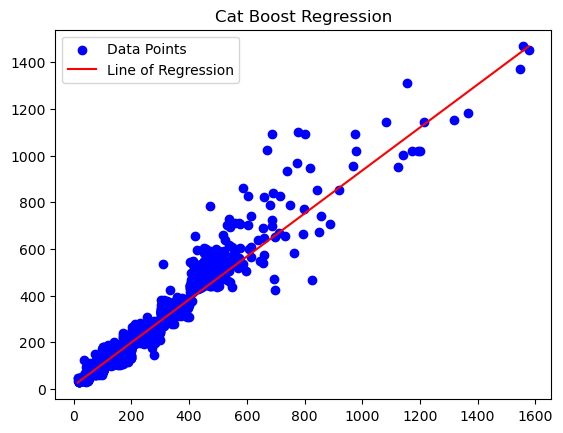

In [57]:
plt.scatter(y_test, y_pred_cat, color='b', label='Data Points')
plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_pred_cat),np.max(y_pred_cat)], color='r', label='Line of Regression')
#plt.scatter(0, intercept, color='y', label='Y_Intercept')
plt.title('Cat Boost Regression')
plt.legend()
plt.show()

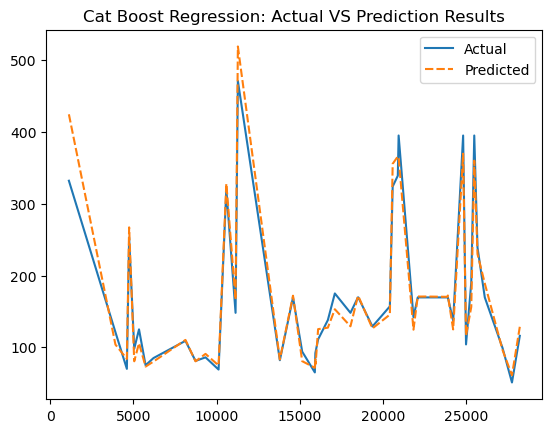

In [58]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_cat})
sns.lineplot(df.head(50))
plt.title('Cat Boost Regression: Actual VS Prediction Results')
plt.show()

## XG Boost Regressor Model

In [59]:
xgb= XGBRegressor()
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
xgb_param_grid = {'n_estimators':[100,200,300],
                 'learning_rate':[0.1,0.01],
                 'depth':[3,5,7]}

In [61]:
xgb_grid_search=GridSearchCV(xgb, xgb_param_grid, cv=5)
model_xgb= xgb_grid_search

In [62]:
model_xgb.fit(scaled_X_train, y_train)

[21:56:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[21:56:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[21:56:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[21:56:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[21:56:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[21:56:38] WARNING: C:\bu

[22:01:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[22:01:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[22:01:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[22:01:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[22:01:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[22:01:40] WARNING: C:\bu

[22:06:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[22:06:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[22:06:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[22:06:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[22:07:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'depth': [3, 5, 7], 'learning_rate': [0.1, 0.01],
                         'n_estimators': [100, 200, 300]})

In [63]:
xgb_best_params = xgb_grid_search.best_params_

xgb_best_score = xgb_grid_search.best_score_

print('XGBoost best parameters:',xgb_best_params)
print('XGBoost best score:',xgb_best_score)

XGBoost best parameters: {'depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
XGBoost best score: 0.9261417833489588


In [64]:
y_pred_xgb=model_xgb.predict(scaled_X_test)

mae_xgb=mean_absolute_error(y_test,y_pred_xgb)
rmse_xgb=np.sqrt(mean_squared_error(y_test, y_pred_xgb))

evs_xgb= explained_variance_score(y_test,y_pred_xgb)


print('Mean Absolute Error of Cat Boost Regression:', mae_xgb)
print('Root Mean Squared Error of Cat Boost Regression:', rmse_xgb)
print('Coeffecient of Determination of Cat Boost Regression:', evs_xgb)


Mean Absolute Error of Cat Boost Regression: 13.605039954907962
Root Mean Squared Error of Cat Boost Regression: 25.80108555148271
Coeffecient of Determination of Cat Boost Regression: 0.9558887330325706


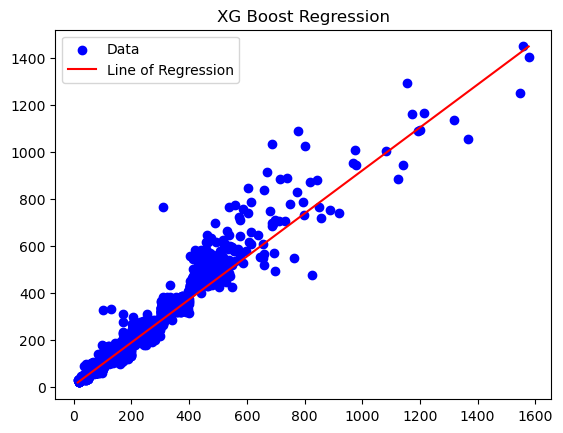

In [65]:
plt.scatter(y_test, y_pred_xgb, color='b', label='Data')
plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_pred_xgb),np.max(y_pred_xgb)], color='r', label='Line of Regression')
#plt.scatter(0, intercept, color='y', label='Y_Intercept')
plt.title('XG Boost Regression')
plt.legend()
plt.show()

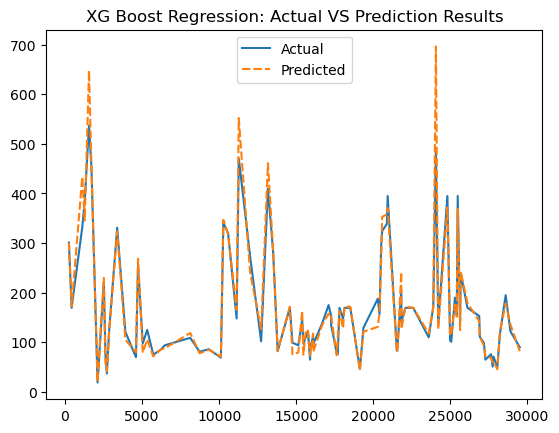

In [66]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
sns.lineplot(df.head(100))
plt.title('XG Boost Regression: Actual VS Prediction Results')
plt.show()

In [67]:
svr=SVR()
gb=GradientBoostingRegressor()
knn=KNeighborsRegressor()

In [68]:
models=[svr, gb, knn]
model_names=["SVR", 'Gradient Boosting', 'KNN']
mae_list=[]
rmse_list=[]
evs_list=[]

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    #r2s=r2_score(y_test, y_pred)
    evs= explained_variance_score(y_test, y_pred)
    mae_list.append(mae)
    rmse_list.append(rmse)
    evs_list.append(evs)
    print(f'{name}, MAE: {mae}')
    print(f'{name}, RMSE:{rmse}')
    #print(f'{name}, R2Score:{r2s}')
    print(f'{name},Explained Variance Score:{evs}')
    print(mae_list)

SVR, MAE: 32.605844290758704
SVR, RMSE:74.15426691974668
SVR,Explained Variance Score:0.6395302270632869
[32.605844290758704]
Gradient Boosting, MAE: 16.152569978709607
Gradient Boosting, RMSE:28.8469734198087
Gradient Boosting,Explained Variance Score:0.9448134754019115
[32.605844290758704, 16.152569978709607]
KNN, MAE: 22.887737938039614
KNN, RMSE:49.34201034955269
KNN,Explained Variance Score:0.8386524923386327
[32.605844290758704, 16.152569978709607, 22.887737938039614]


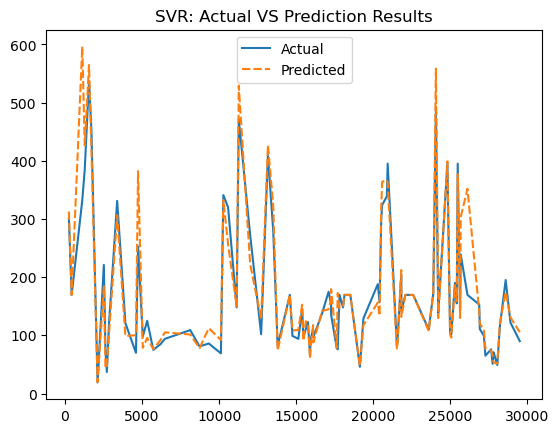

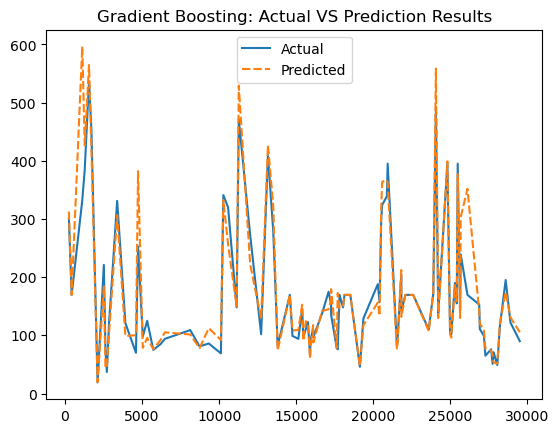

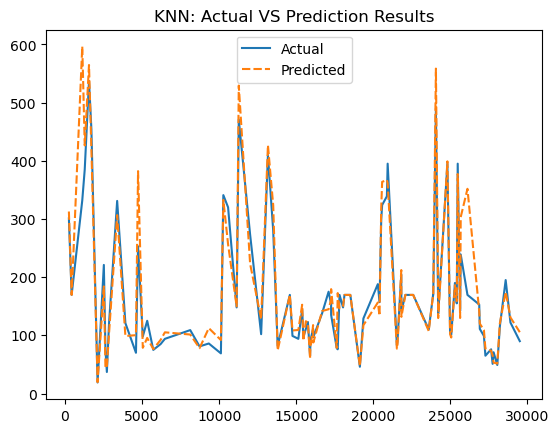

In [94]:
for model, name in zip(models, model_names):
    df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    sns.lineplot(df.head(100))
    plt.title(f'{name}: Actual VS Prediction Results')
    plt.show()

In [73]:
print(mae_list,rmse_list,evs_list)

[32.605844290758704, 16.152569978709607, 22.887737938039614] [74.15426691974668, 28.8469734198087, 49.34201034955269] [0.6395302270632869, 0.9448134754019115, 0.8386524923386327]


### Visualize the Metric Scores of the Models Developed using different regression algorithms 

The higher the explained variance score better accuracy of the model   

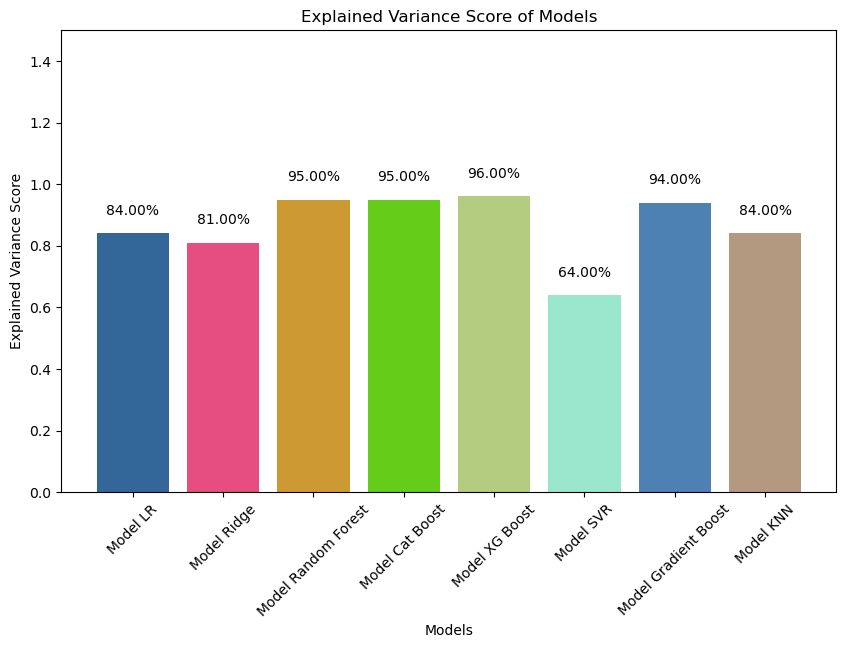

In [74]:
evs_score = [evs, evs_rid, evs_rf, evs_cat, evs_xgb]
evs_scores= evs_score+ evs_list
Scores = [round(i,2) for i in evs_scores]

model_name=['Model LR','Model Ridge', 'Model Random Forest', 'Model Cat Boost', 'Model XG Boost', 'Model SVR', 'Model Gradient Boost','Model KNN' ]

colors= [(0.2,0.4,0.6),(0.9,0.3,0.5),(0.8,0.6,0.2), (0.4,0.8,0.1),(0.7,0.8,0.5),(0.6,0.9,0.8),(0.3,0.5,0.7),(0.7,0.6,0.5)]

plt.figure(figsize=(10,6))
plt.bar(model_name, Scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Explained Variance Score')
plt.title('Explained Variance Score of Models')
plt.xticks(rotation=45)
plt.ylim(bottom=0.0, top=1.50)

for i, score in enumerate(Scores):
    percentage = f'{score*100:.2f}%'
    plt.text(i, score+0.05, percentage, ha='center', va='bottom')

plt.show()


This graph shows that XGBoost Regression model performs well and good with highest accuracy(explained variance score) of 96% followed by Random forest regression and Cat Boost regression with accuracy(explained variance score) of 95% respectively.

#### MAE and RMSE of all the models

The lower the mean absolute error and root mean squared error th better the accuracy of the model

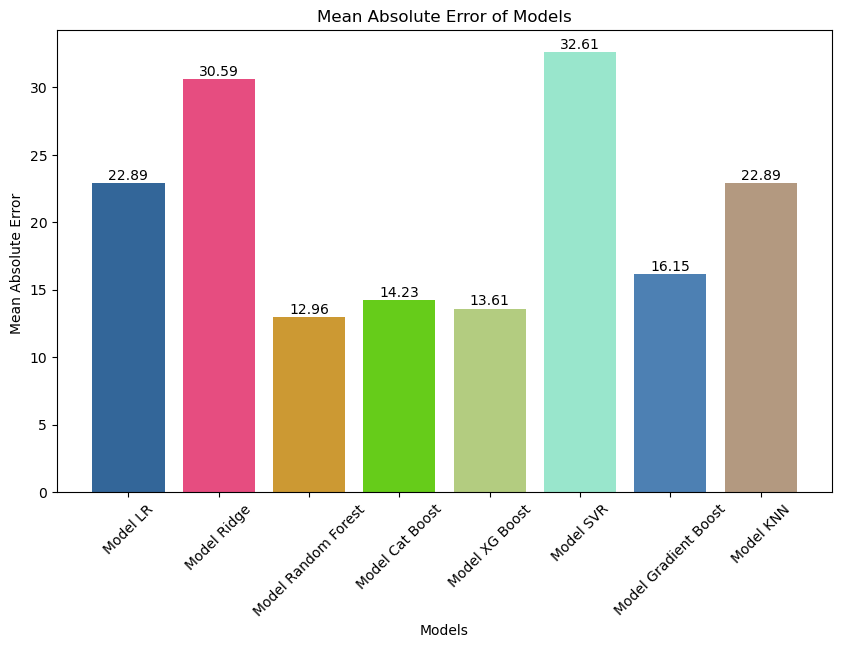

In [79]:
mae_s1 = [mae, mae_rid, mae_rf, mae_cat, mae_xgb]
mae_s= mae_s1 + mae_list
Scores_mae = [round(i,2) for i in mae_s]

model_name=['Model LR','Model Ridge', 'Model Random Forest', 'Model Cat Boost', 'Model XG Boost', 'Model SVR', 'Model Gradient Boost','Model KNN' ]

colors= [(0.2,0.4,0.6),(0.9,0.3,0.5),(0.8,0.6,0.2), (0.4,0.8,0.1),(0.7,0.8,0.5),(0.6,0.9,0.8),(0.3,0.5,0.7),(0.7,0.6,0.5)]

plt.figure(figsize=(10,6))
plt.bar(model_name, Scores_mae, color=colors)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error ')
plt.title('Mean Absolute Error of Models')
plt.xticks(rotation=45)

for i, score in enumerate(Scores_mae):
    plt.text(i, score+0.05,Scores_mae[i], ha='center', va='bottom')

plt.show()

XG Boost regressor has the Lowest MAE 

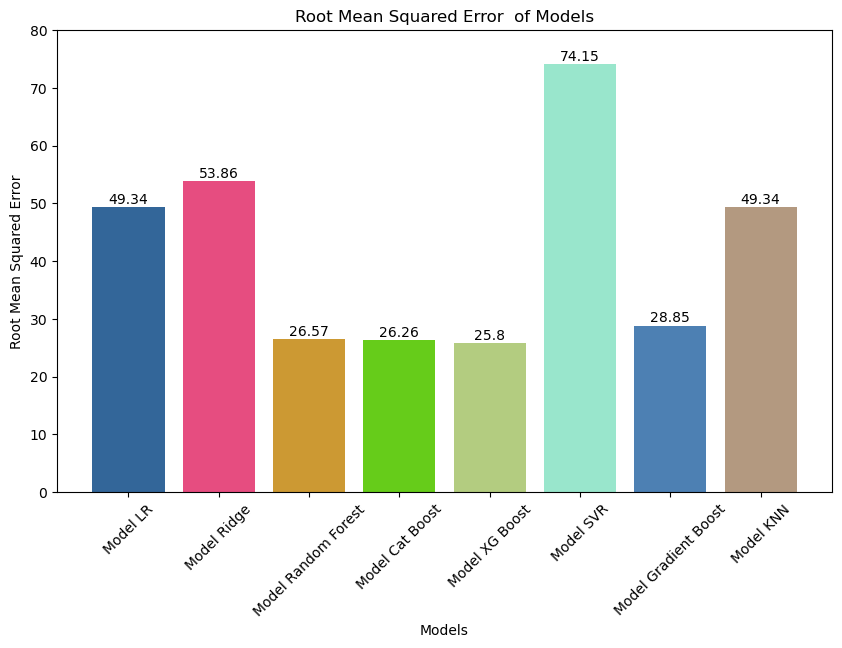

In [89]:
rmse_s1 = [rmse, rmse_rid, rmse_rf, rmse_cat, rmse_xgb]
rmse_s= rmse_s1 + rmse_list
Scores_rmse = [round(i,2) for i in rmse_s]

model_name=['Model LR','Model Ridge', 'Model Random Forest', 'Model Cat Boost', 'Model XG Boost', 'Model SVR', 'Model Gradient Boost','Model KNN' ]

colors= [(0.2,0.4,0.6),(0.9,0.3,0.5),(0.8,0.6,0.2), (0.4,0.8,0.1),(0.7,0.8,0.5),(0.6,0.9,0.8),(0.3,0.5,0.7),(0.7,0.6,0.5)]

plt.figure(figsize=(10,6))
plt.bar(model_name, Scores_rmse, color=colors)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error  of Models')
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=80)

for i, score in enumerate(Scores_rmse):
    plt.text(i, score+0.05,Scores_rmse[i],ha='center', va='bottom')

plt.show()

In [92]:
print(len(model_name))
print(len(Scores_mae))
print(len(Scores_rmse))
print(len(Scores))

8
8
8
8


In [93]:
dafr=pd.DataFrame({'Model': model_name,'MAE':Scores_mae,'RMSE':Scores_rmse,'ExpVarScore':Scores})
dafr.set_index('Model',inplace=True)
print(dafr)

                        MAE   RMSE  ExVarScore
Model                                         
Model LR              22.89  49.34        0.84
Model Ridge           30.59  53.86        0.81
Model Random Forest   12.96  26.57        0.95
Model Cat Boost       14.23  26.26        0.95
Model XG Boost        13.61  25.80        0.96
Model SVR             32.61  74.15        0.64
Model Gradient Boost  16.15  28.85        0.94
Model KNN             22.89  49.34        0.84


XG Boost model has the lowest MAE & RMSE score than other models.

## Export The Model

In [72]:
import pickle

with open('ML_Model_XGB_AQI_Est.pkl','wb') as f:
    pickle.dump(model_xgb, f)